In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats


### MARIA FERNANDA MORALES ALVAREZ CARNET: 22007685
TAREA No. 1

In [16]:
dataHP = pd.read_csv('train_hp.csv')
dataHP.shape

(1460, 81)

In [17]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
dataHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
dataHP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
dataHP.isna().sum()/dataHP.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [21]:
dataHP.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [22]:
cols_con_na = [col for col in dataHP if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [23]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [24]:
tarea1 = dataHP.copy()
tarea1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
def valoresnulos(tarea1):
  
    columnas_object = tarea1.select_dtypes(include=['object']).columns

    for columna in columnas_object:
        menoscomun = tarea1[columna].value_counts().idxmin()
        tarea1[columna] = tarea1[columna].fillna(menoscomun)

    return tarea1

In [26]:
Nonulos= valoresnulos(tarea1)
print(Nonulos)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Pave      Reg   
1        2          20       RL         80.0     9600   Pave  Pave      Reg   
2        3          60       RL         68.0    11250   Pave  Pave      IR1   
3        4          70       RL         60.0     9550   Pave  Pave      IR1   
4        5          60       RL         84.0    14260   Pave  Pave      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave  Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave  Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave  Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave  Pave      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [27]:
Nonulos['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      23
Name: MasVnrType, dtype: int64

### MARIA FERNANDA MORALES ALVAREZ CARNET: 22007685
### Tarea #2 - (Ingeniería de Características - parte 2)

In [28]:
tarea2 = Nonulos.copy()
tarea2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Pave,Reg,Lvl,AllPub,...,0,Ex,MnWw,TenC,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Pave,Reg,Lvl,AllPub,...,0,Ex,MnWw,TenC,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Pave,IR1,Lvl,AllPub,...,0,Ex,MnWw,TenC,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Pave,IR1,Lvl,AllPub,...,0,Ex,MnWw,TenC,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Pave,IR1,Lvl,AllPub,...,0,Ex,MnWw,TenC,0,12,2008,WD,Normal,250000


### Outliers

In [29]:
def getColumnTypes(dataset):
    '''Descripción: Esta función extrae el tipo de dominio de las columnas de un dataset.
       Entradas: Pandas Dataframe
       SAlida:Tupla con arreglo que contiene nombres de las columnas'''
    
    continuas=[]
    discretas=[]
    categoricas=[]
    for col in dataset.columns:
        if((dataset[col].dtype=='int64') or (dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)

    return continuas, discretas, categoricas

In [30]:
continuas, discretas, categoricas = getColumnTypes(tarea2)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

## Gráficas continuas y discretas

In [31]:
def plotDistBoxQQ(dataset, col):

    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(dataset[col], bins=30)
    plt.title("Histograma y Densidad")


    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")


    plt.subplot(1,3,3)
    stats.probplot(dataset[col], dist="norm", plot=plt)
    plt.title("Q-Q Plot")

-----------Id--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------LotFrontage--------------
-----------LotArea--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------YearBuilt--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------YearRemodAdd--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------MasVnrArea--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BsmtFinSF1--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BsmtFinSF2--------------
-----------BsmtUnfSF--------------

c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



-----------TotalBsmtSF--------------

c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



-----------1stFlrSF--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------2ndFlrSF--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------GrLivArea--------------
-----------GarageYrBlt--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------GarageArea--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------WoodDeckSF--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------OpenPorchSF--------------
-----------EnclosedPorch--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------ScreenPorch--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------SalePrice--------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


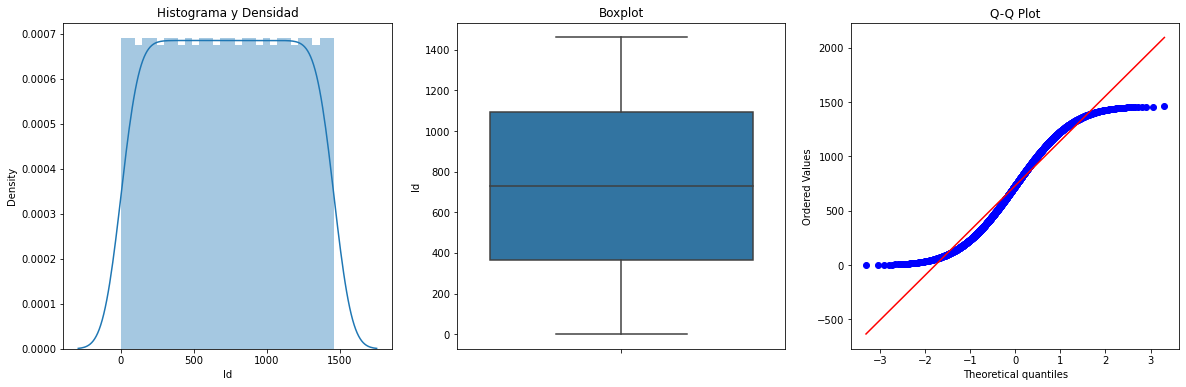

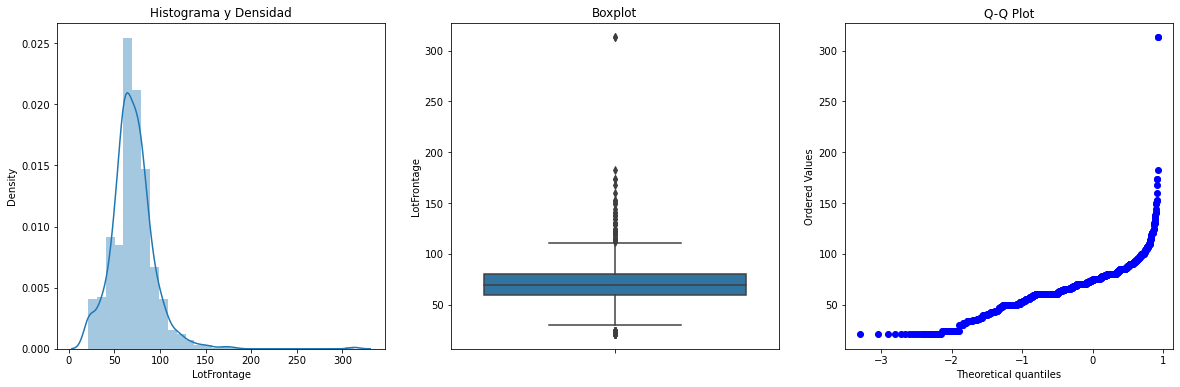

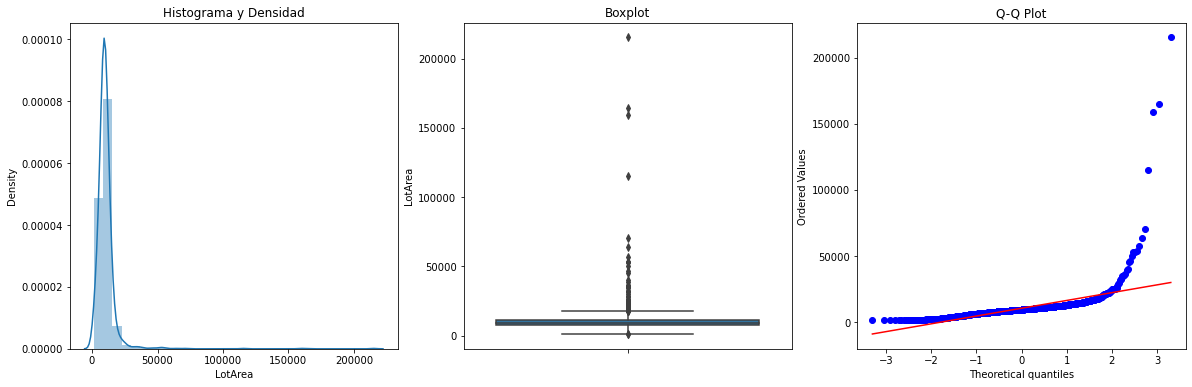

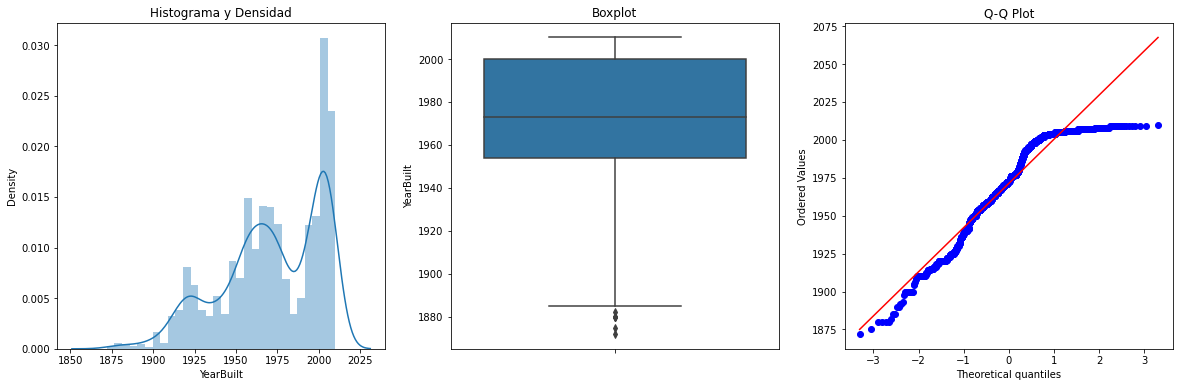

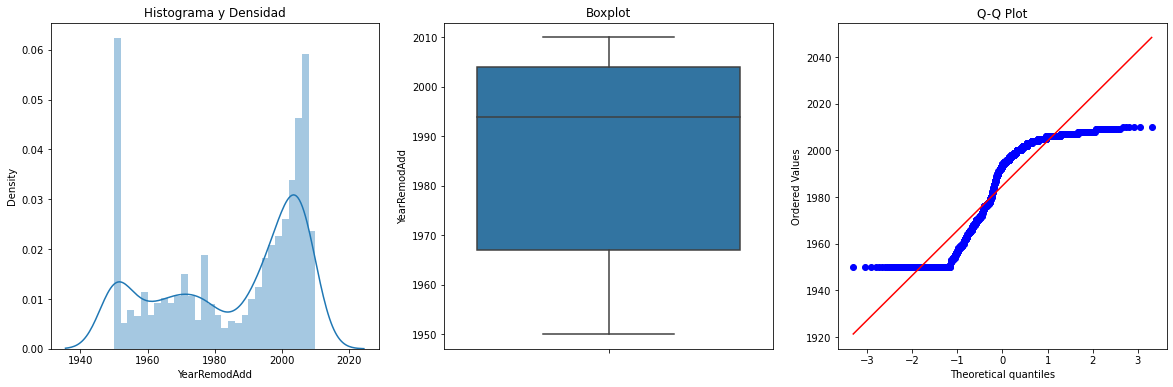

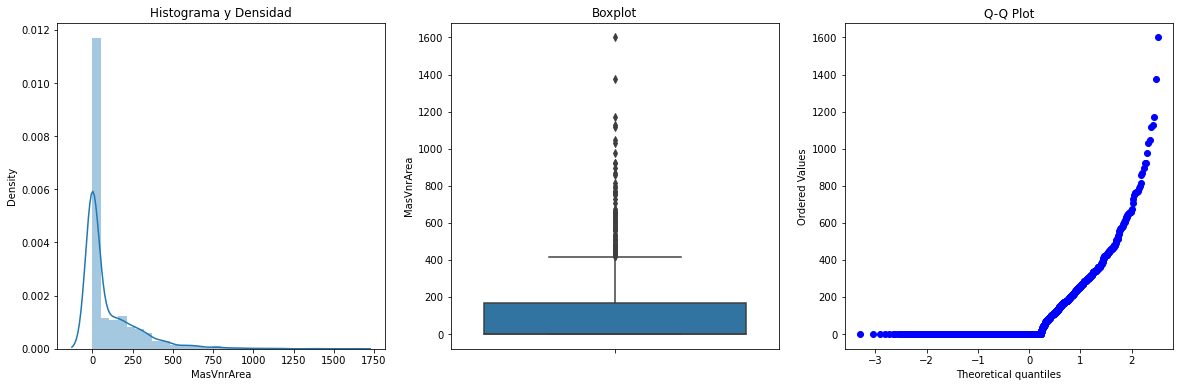

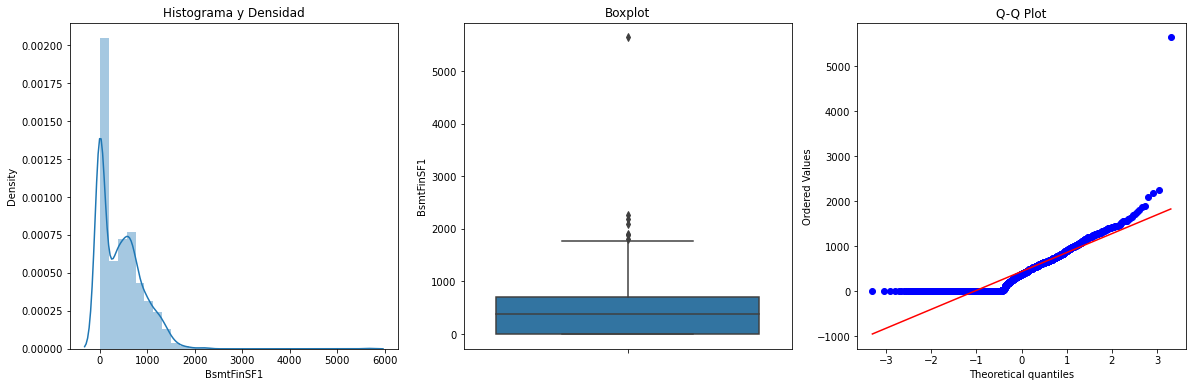

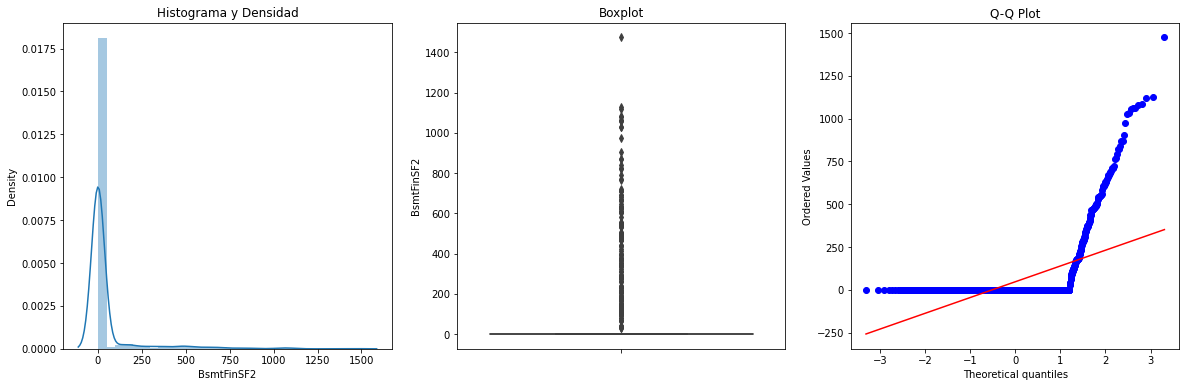

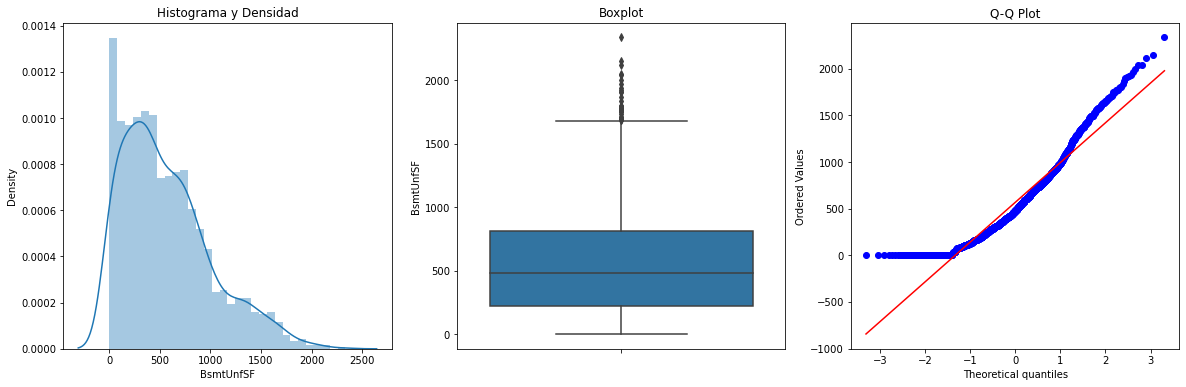

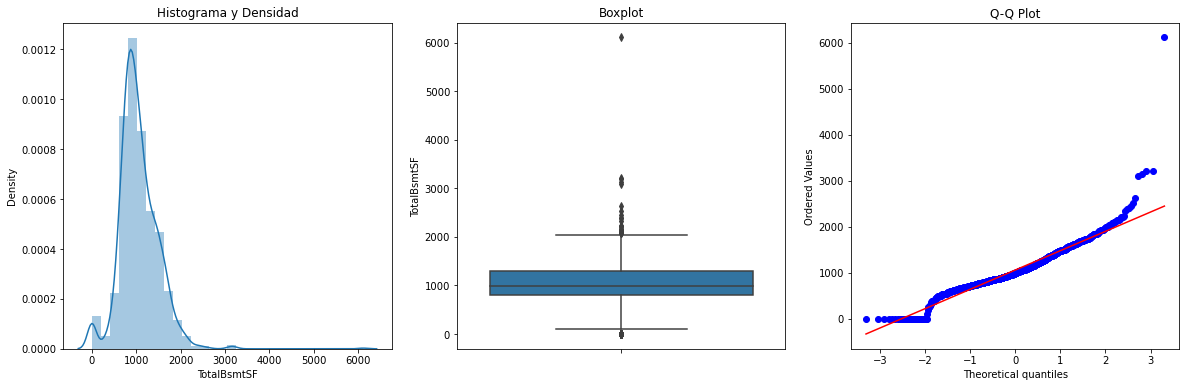

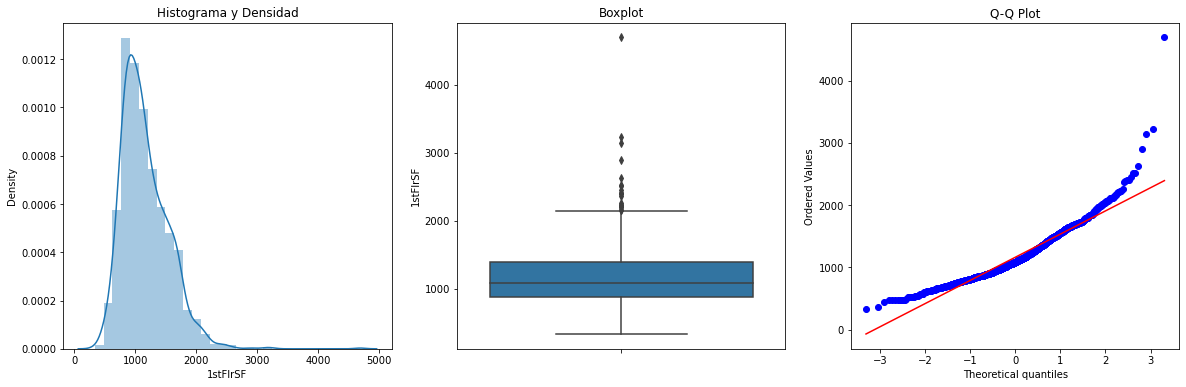

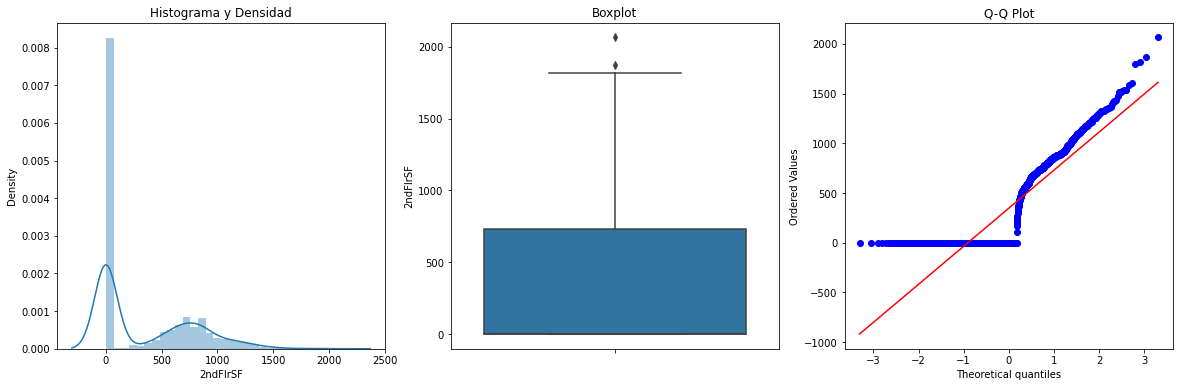

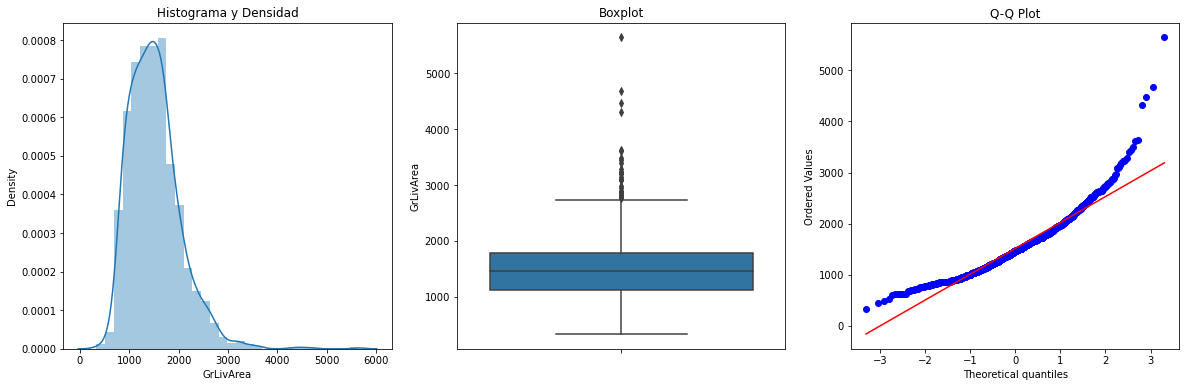

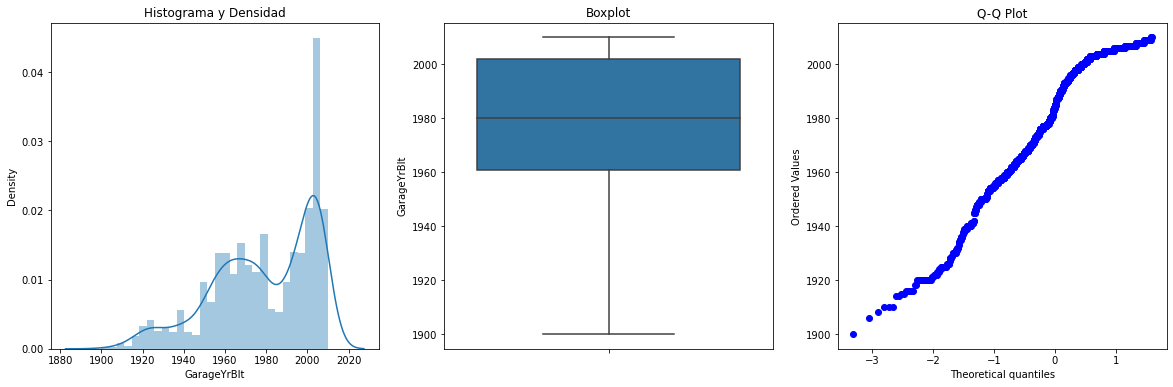

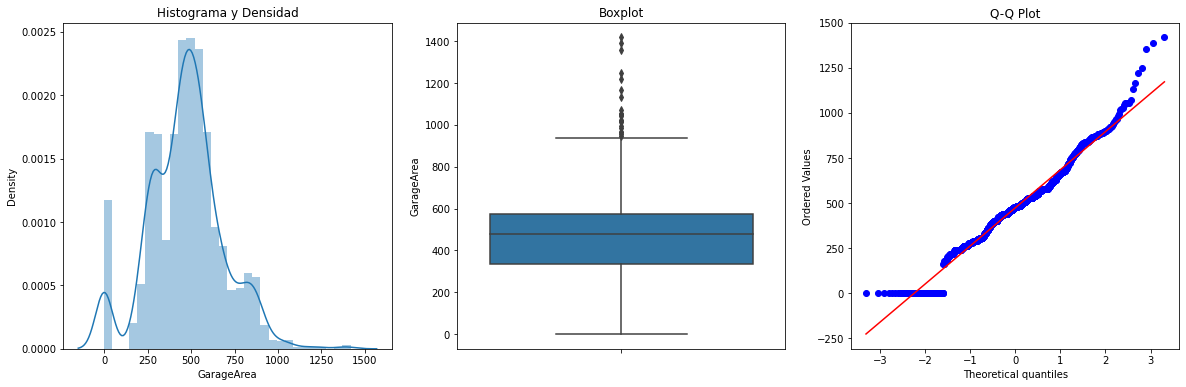

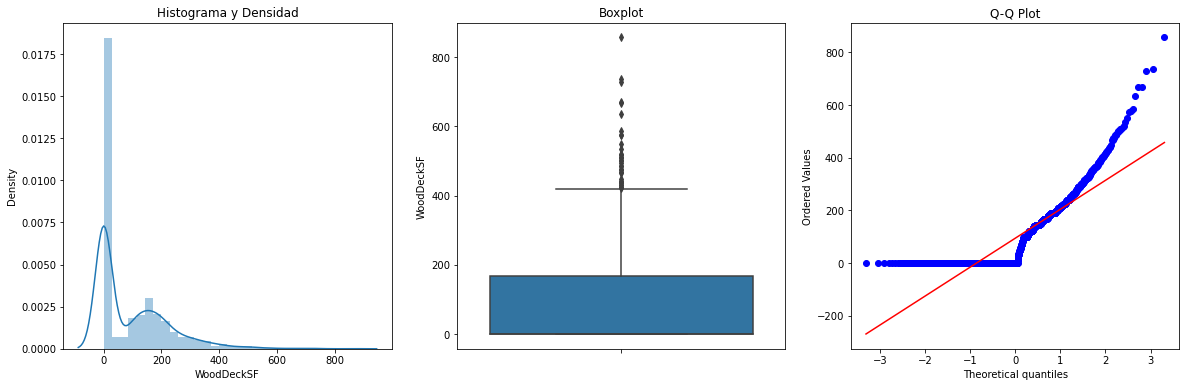

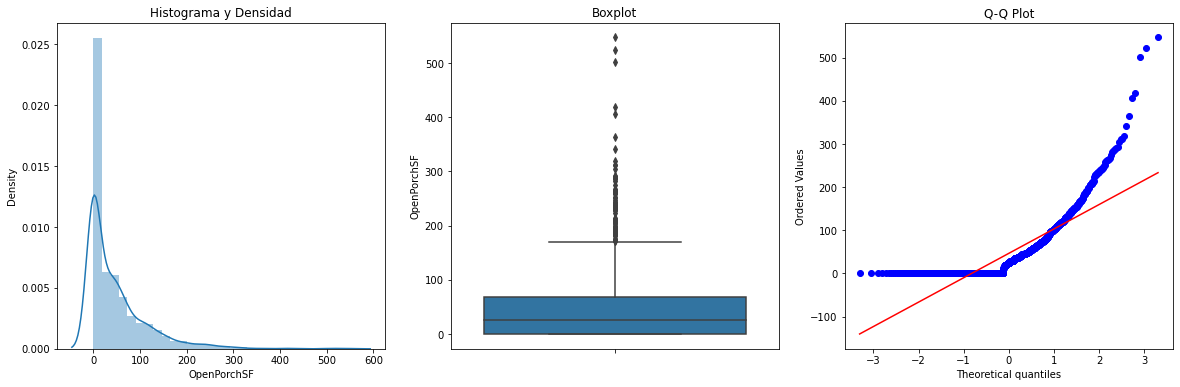

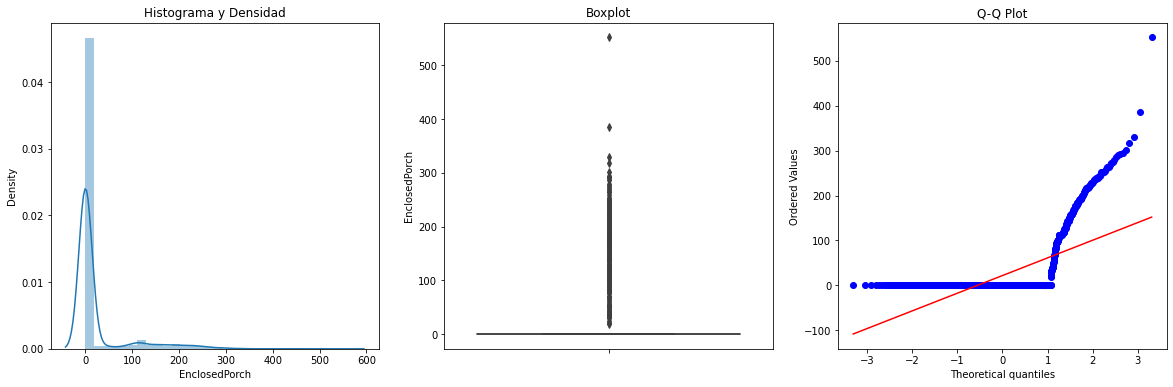

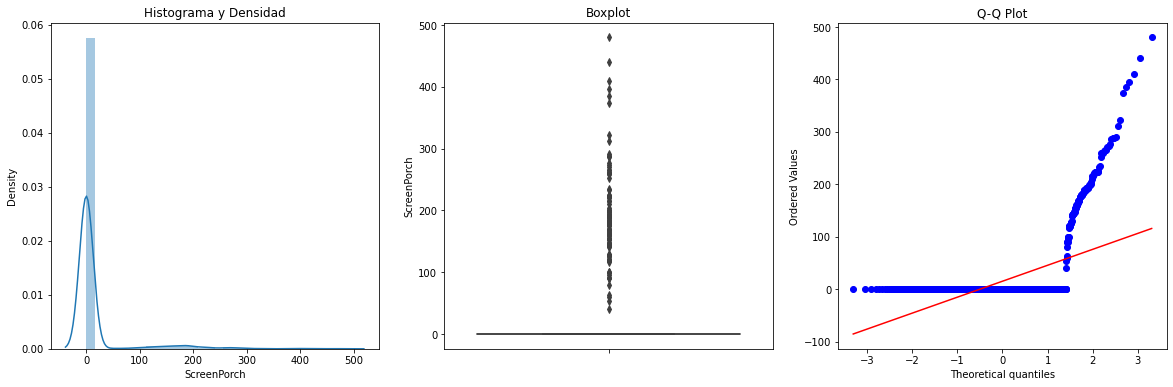

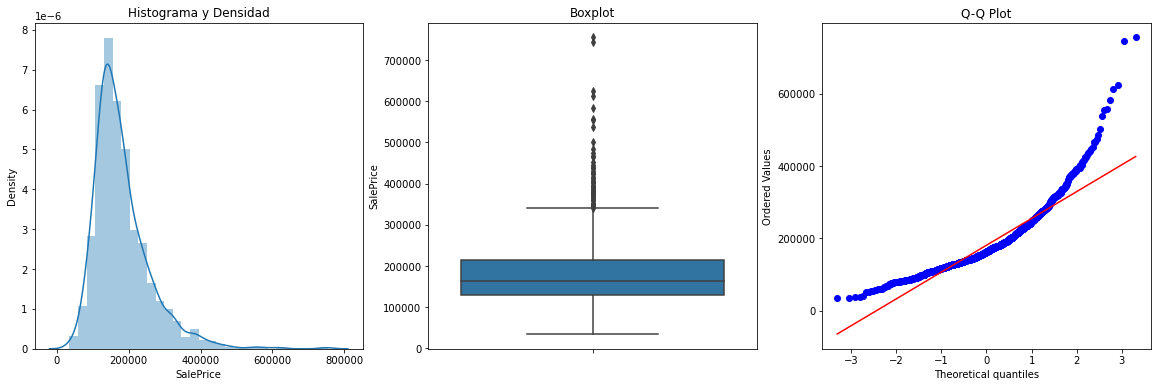

In [32]:
for col in continuas:
    print(f"-----------{col}--------------")
    plotDistBoxQQ(tarea2,col)

-----------MSSubClass------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------OverallQual------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------OverallCond------------
-----------LowQualFinSF------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BsmtFullBath------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BsmtHalfBath------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------FullBath------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------HalfBath------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BedroomAbvGr------------
-----------KitchenAbvGr------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------TotRmsAbvGrd------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------Fireplaces------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------GarageCars------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------3SsnPorch------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------PoolArea------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------MiscVal------------
-----------MoSold------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------YrSold------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


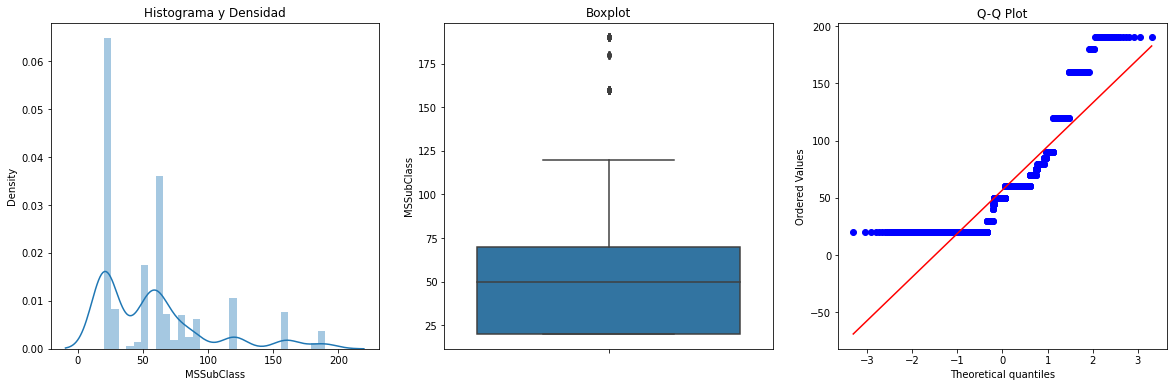

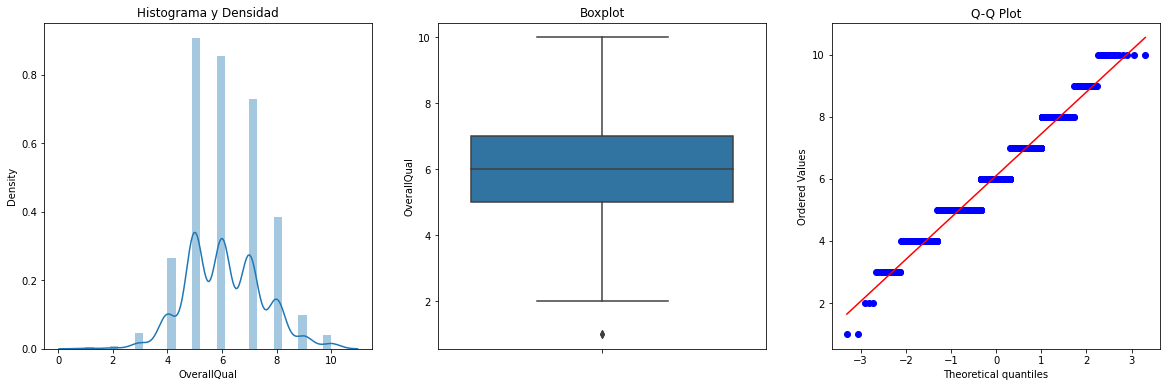

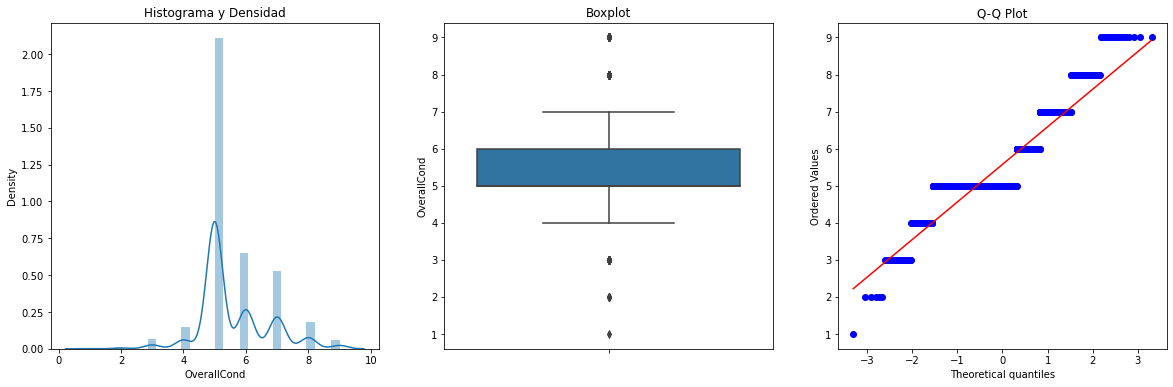

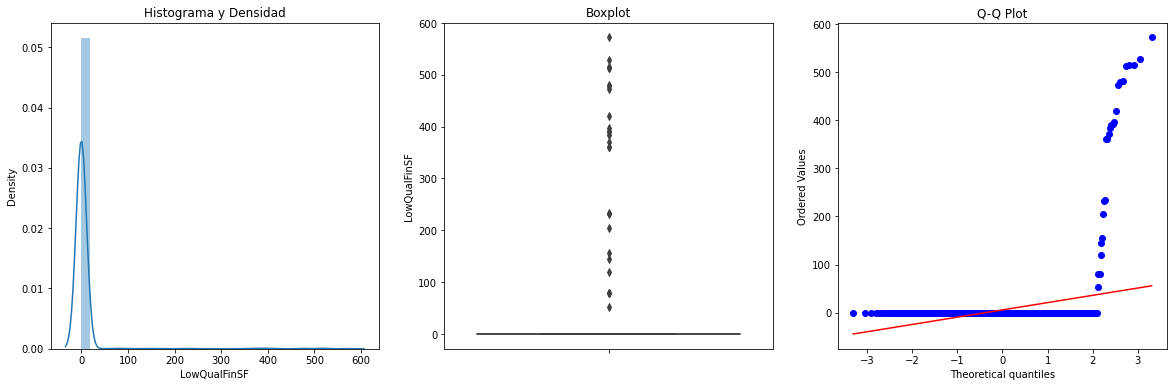

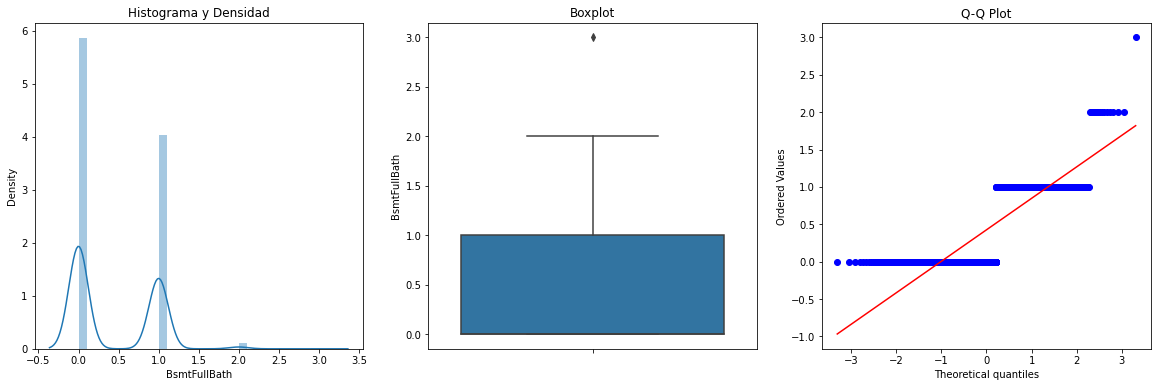

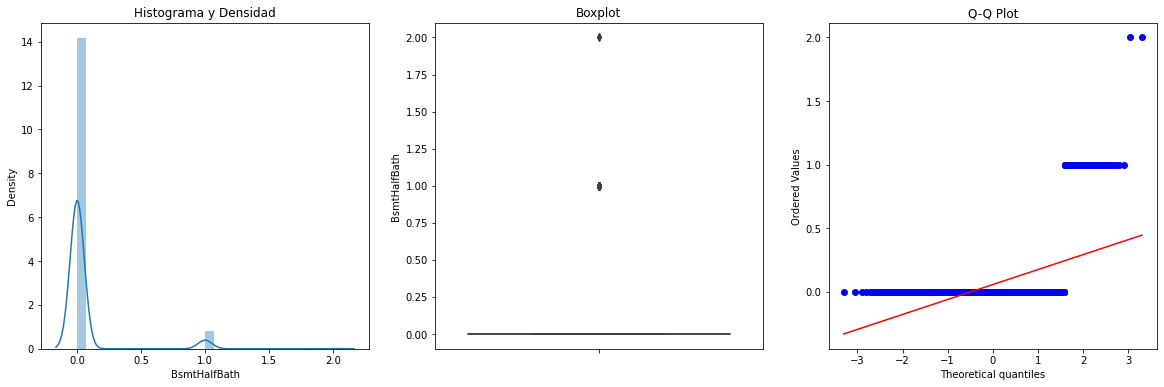

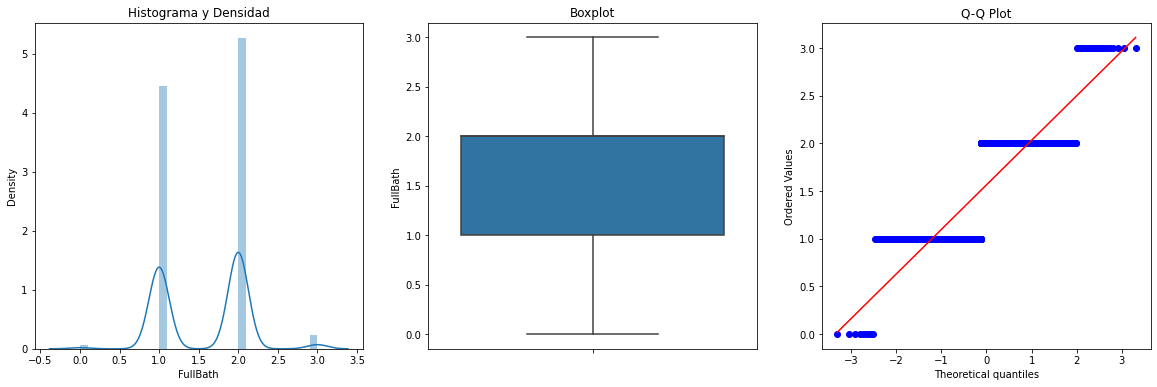

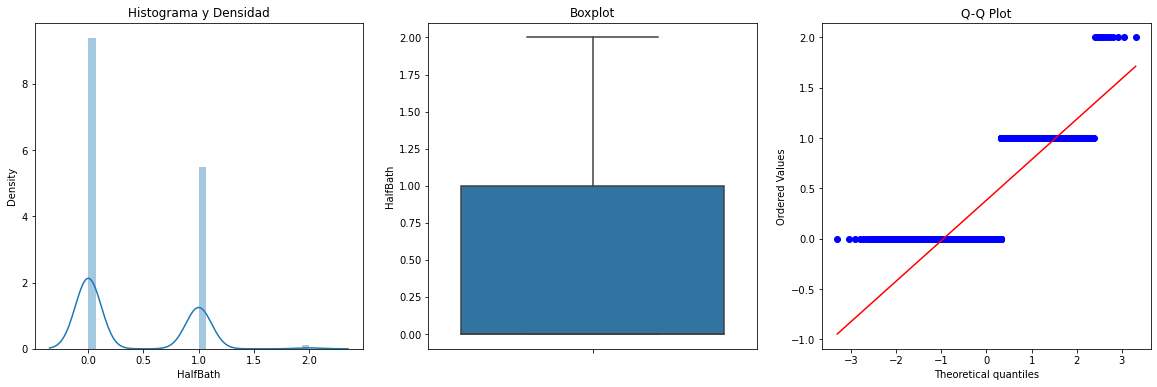

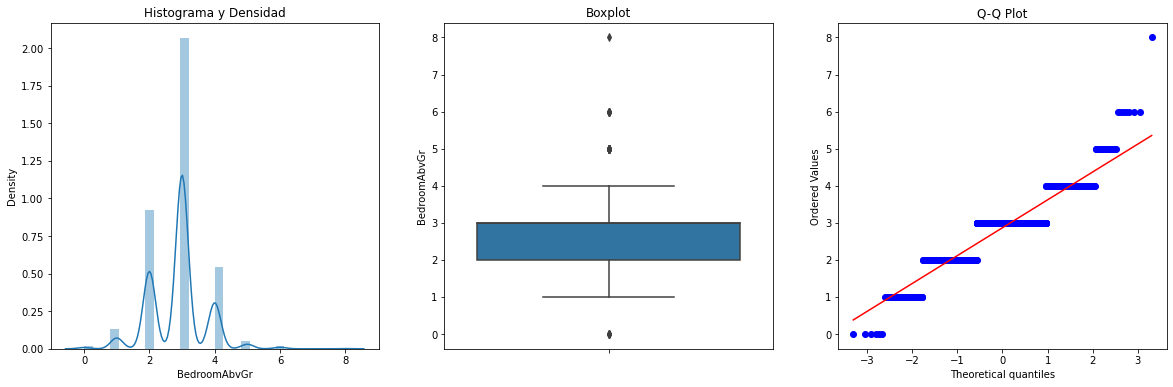

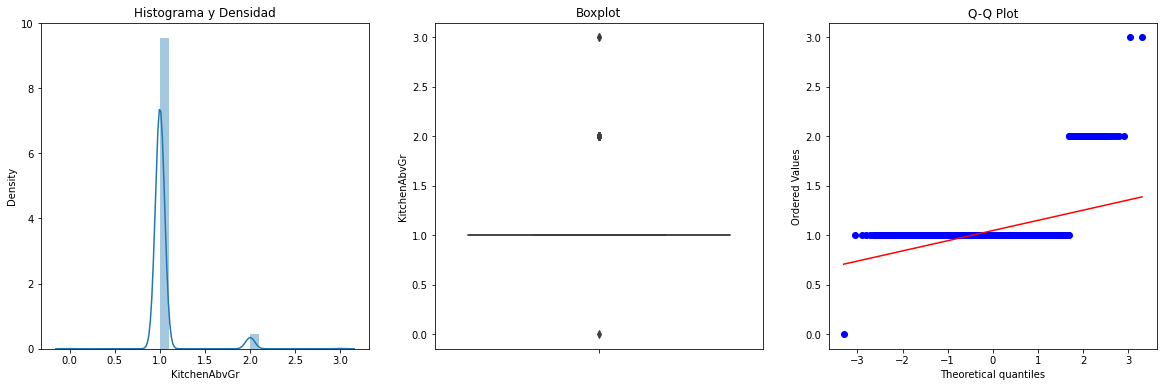

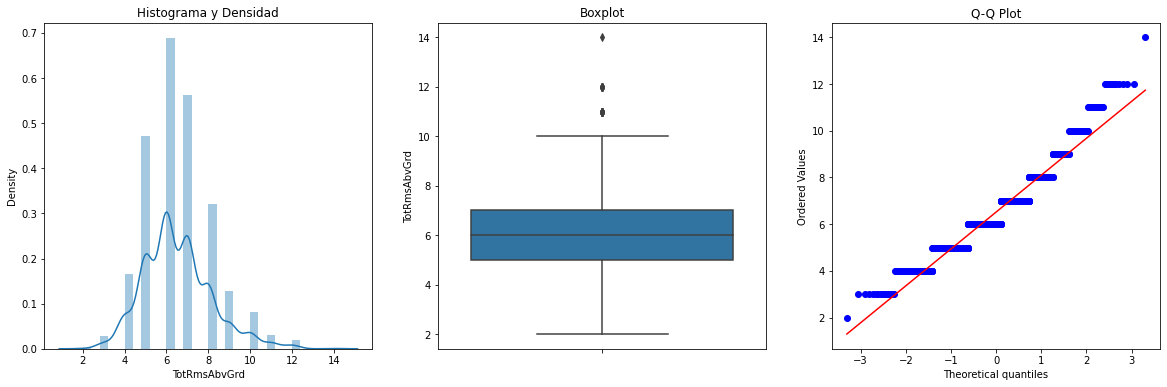

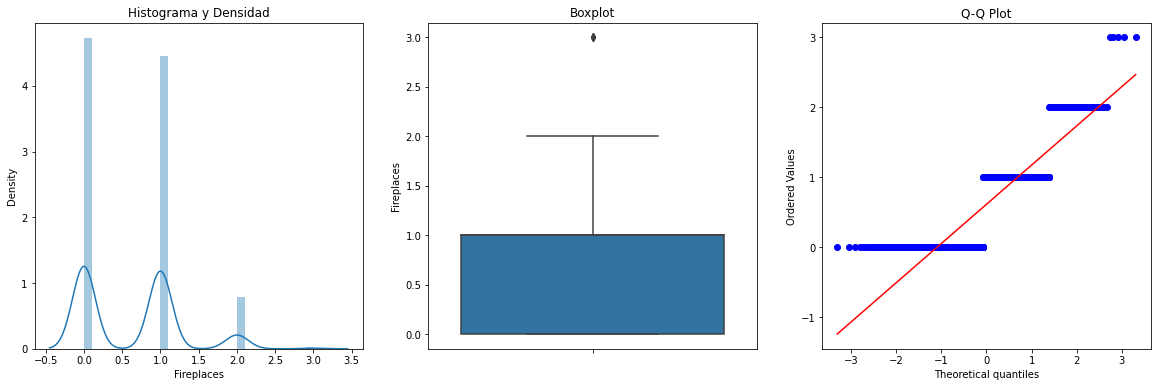

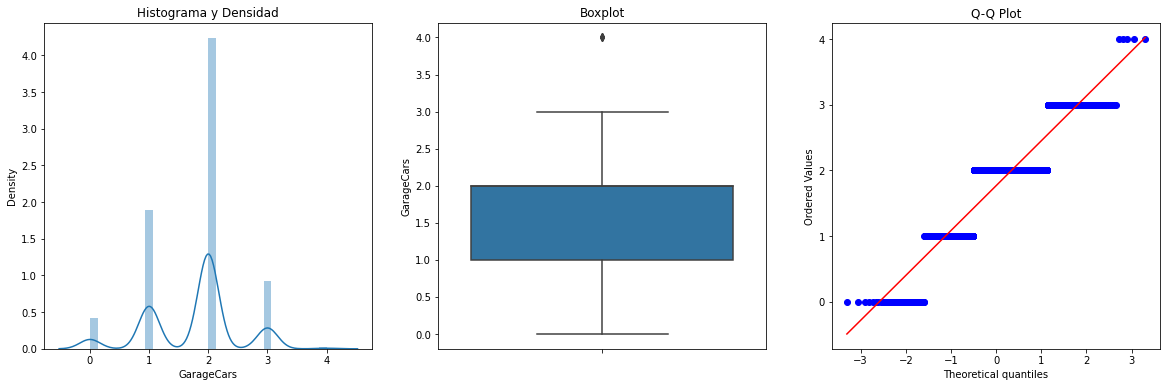

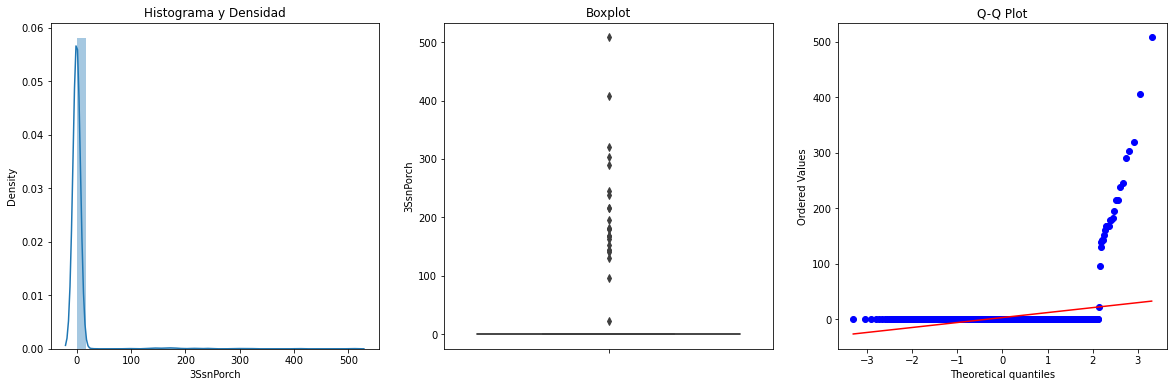

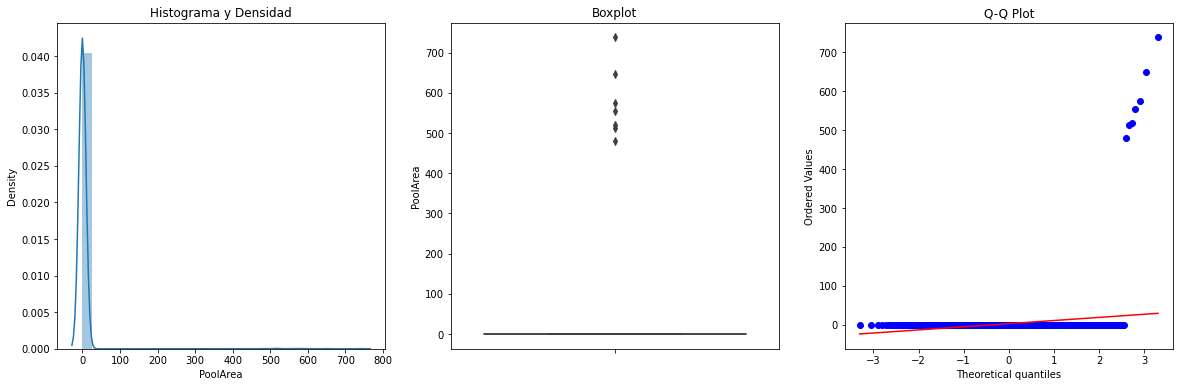

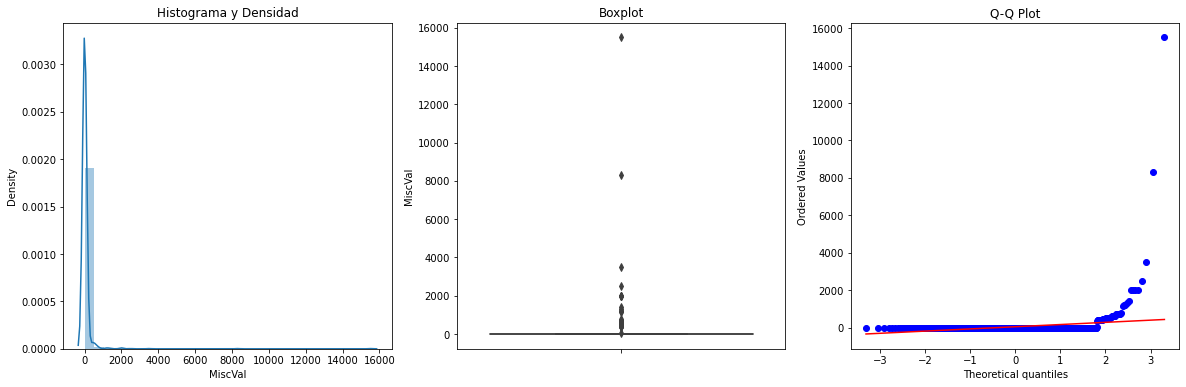

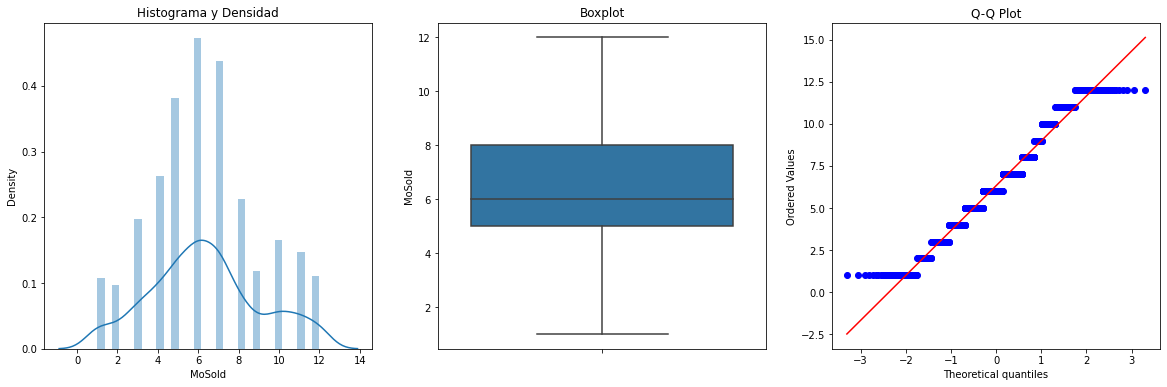

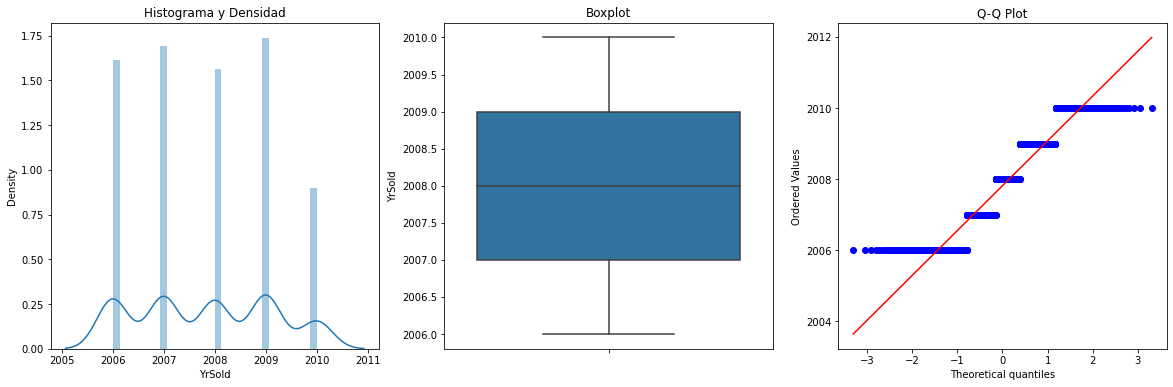

In [33]:
for col in discretas:
    print(f"-----------{col}------------")
    plotDistBoxQQ(tarea2, col)

### Función para IQR, LI Y LS

In [34]:
def detectOutliersLimits(dataset,columnas):
    """ Descripción calcula los limites superiores e inferiores para detección de outliers.
input: dataset-> pandas dataframe, col-> string nombre de columna
output: tupla de floats con los limites superior e inferior"""

    limites = {}
    for col in columnas:
        IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
        LI = dataset[col].quantile(0.25) - (IQR * 1.75)
        LS = dataset[col].quantile(0.75) + (IQR * 1.75)
        limites[col] = (LI, LS)
        
    return limites

In [35]:
limites = detectOutliersLimits(tarea2,continuas)
for col, limitecontinuas in limites.items():
    print(f"Limites: {col}: {limitecontinuas}")

Limites: Id: (-910.875, 2371.875)
Limites: LotFrontage: (22.25, 116.75)
Limites: LotArea: (469.5, 18685.5)
Limites: YearBuilt: (1873.5, 2080.5)
Limites: YearRemodAdd: (1902.25, 2068.75)
Limites: MasVnrArea: (-290.5, 456.5)
Limites: BsmtFinSF1: (-1246.4375, 1958.6875)
Limites: BsmtFinSF2: (0.0, 0.0)
Limites: BsmtUnfSF: (-800.75, 1831.75)
Limites: TotalBsmtSF: (-83.625, 2177.625)
Limites: 1stFlrSF: (-9.1875, 2282.4375)
Limites: 2ndFlrSF: (-1274.0, 2002.0)
Limites: GrLivArea: (-3.1875, 2909.4375)
Limites: GarageYrBlt: (1889.25, 2073.75)
Limites: GarageArea: (-88.125, 998.625)
Limites: WoodDeckSF: (-294.0, 462.0)
Limites: OpenPorchSF: (-119.0, 187.0)
Limites: EnclosedPorch: (0.0, 0.0)
Limites: ScreenPorch: (0.0, 0.0)
Limites: SalePrice: (-17068.75, 361043.75)


In [36]:
limites = detectOutliersLimits(tarea2,discretas)
for col, limitecontinuas in limites.items():
    print(f"Limites: {col}: {limitecontinuas}")

Limites: MSSubClass: (-67.5, 157.5)
Limites: OverallQual: (1.5, 10.5)
Limites: OverallCond: (3.25, 7.75)
Limites: LowQualFinSF: (0.0, 0.0)
Limites: BsmtFullBath: (-1.75, 2.75)
Limites: BsmtHalfBath: (0.0, 0.0)
Limites: FullBath: (-0.75, 3.75)
Limites: HalfBath: (-1.75, 2.75)
Limites: BedroomAbvGr: (0.25, 4.75)
Limites: KitchenAbvGr: (1.0, 1.0)
Limites: TotRmsAbvGrd: (1.5, 10.5)
Limites: Fireplaces: (-1.75, 2.75)
Limites: GarageCars: (-0.75, 3.75)
Limites: 3SsnPorch: (0.0, 0.0)
Limites: PoolArea: (0.0, 0.0)
Limites: MiscVal: (0.0, 0.0)
Limites: MoSold: (-0.25, 13.25)
Limites: YrSold: (2003.5, 2012.5)


### Eliminando Negativos CONTINUAS Y DISCRETAS

In [37]:
def detectOutliersLimits(dataset,columnas):

    limites = {}
    for col in columnas:
        IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
        LI = max(0,dataset[col].quantile(0.25) - (IQR * 1.75))
        LS = dataset[col].quantile(0.75) + (IQR * 1.75)
        limites[col] = (LI, LS)
        
    return limites

In [38]:
limites = detectOutliersLimits(tarea2,continuas)
for col, limitecontinuas in limites.items():
    print(f"Limites: {col}: {limitecontinuas}")

Limites: Id: (0, 2371.875)
Limites: LotFrontage: (22.25, 116.75)
Limites: LotArea: (469.5, 18685.5)
Limites: YearBuilt: (1873.5, 2080.5)
Limites: YearRemodAdd: (1902.25, 2068.75)
Limites: MasVnrArea: (0, 456.5)
Limites: BsmtFinSF1: (0, 1958.6875)
Limites: BsmtFinSF2: (0, 0.0)
Limites: BsmtUnfSF: (0, 1831.75)
Limites: TotalBsmtSF: (0, 2177.625)
Limites: 1stFlrSF: (0, 2282.4375)
Limites: 2ndFlrSF: (0, 2002.0)
Limites: GrLivArea: (0, 2909.4375)
Limites: GarageYrBlt: (1889.25, 2073.75)
Limites: GarageArea: (0, 998.625)
Limites: WoodDeckSF: (0, 462.0)
Limites: OpenPorchSF: (0, 187.0)
Limites: EnclosedPorch: (0, 0.0)
Limites: ScreenPorch: (0, 0.0)
Limites: SalePrice: (0, 361043.75)


In [39]:
limites = detectOutliersLimits(tarea2,discretas)
for col, limitecontinuas in limites.items():
    print(f"Limites: {col}: {limitecontinuas}")

Limites: MSSubClass: (0, 157.5)
Limites: OverallQual: (1.5, 10.5)
Limites: OverallCond: (3.25, 7.75)
Limites: LowQualFinSF: (0, 0.0)
Limites: BsmtFullBath: (0, 2.75)
Limites: BsmtHalfBath: (0, 0.0)
Limites: FullBath: (0, 3.75)
Limites: HalfBath: (0, 2.75)
Limites: BedroomAbvGr: (0.25, 4.75)
Limites: KitchenAbvGr: (1.0, 1.0)
Limites: TotRmsAbvGrd: (1.5, 10.5)
Limites: Fireplaces: (0, 2.75)
Limites: GarageCars: (0, 3.75)
Limites: 3SsnPorch: (0, 0.0)
Limites: PoolArea: (0, 0.0)
Limites: MiscVal: (0, 0.0)
Limites: MoSold: (0, 13.25)
Limites: YrSold: (2003.5, 2012.5)


#### Capping

In [40]:
def OutliersLimits(dataset, columnas, limits):
    for col in columnas:
        LI, LS = limits[col]
        dataset[col] = np.where(dataset[col] > LS, LS, 
                                np.where(dataset[col] < LI, LI, dataset[col]))
    return dataset

In [41]:
limitsvariables = detectOutliersLimits(tarea2, continuas)
dflimits = OutliersLimits(tarea2, continuas, limitsvariables)
print(dflimits)

          Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1.0          60       RL         65.0   8450.0   Pave  Pave      Reg   
1        2.0          20       RL         80.0   9600.0   Pave  Pave      Reg   
2        3.0          60       RL         68.0  11250.0   Pave  Pave      IR1   
3        4.0          70       RL         60.0   9550.0   Pave  Pave      IR1   
4        5.0          60       RL         84.0  14260.0   Pave  Pave      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456.0          60       RL         62.0   7917.0   Pave  Pave      Reg   
1456  1457.0          20       RL         85.0  13175.0   Pave  Pave      Reg   
1457  1458.0          70       RL         66.0   9042.0   Pave  Pave      Reg   
1458  1459.0          20       RL         68.0   9717.0   Pave  Pave      Reg   
1459  1460.0          20       RL         75.0   9937.0   Pave  Pave      Reg   

     LandContour Utilities 

-----------Id------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------LotFrontage------------
-----------LotArea------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------YearBuilt------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------YearRemodAdd------------
-----------MasVnrArea------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BsmtFinSF1------------
-----------BsmtFinSF2------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seab

-----------BsmtUnfSF------------
-----------TotalBsmtSF------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------1stFlrSF------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------2ndFlrSF------------
-----------GrLivArea------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------GarageYrBlt------------
-----------GarageArea------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------WoodDeckSF------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------OpenPorchSF------------
-----------EnclosedPorch------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seab

-----------ScreenPorch------------
-----------SalePrice------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


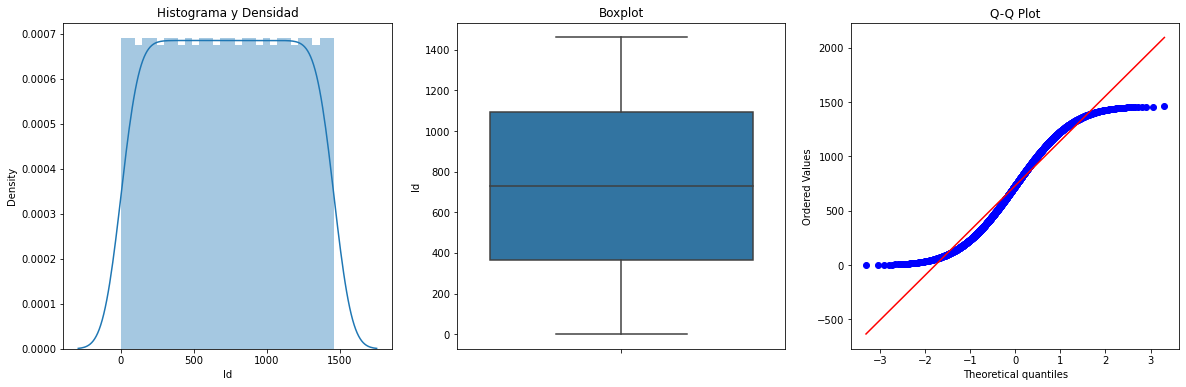

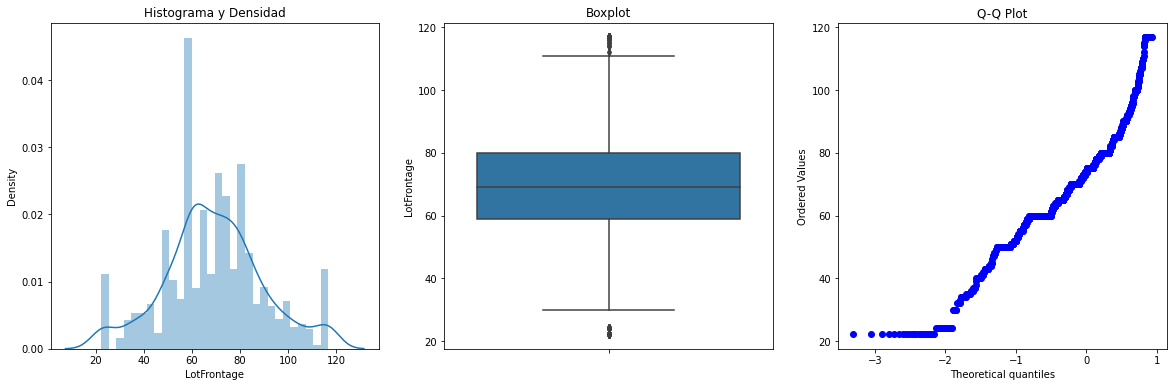

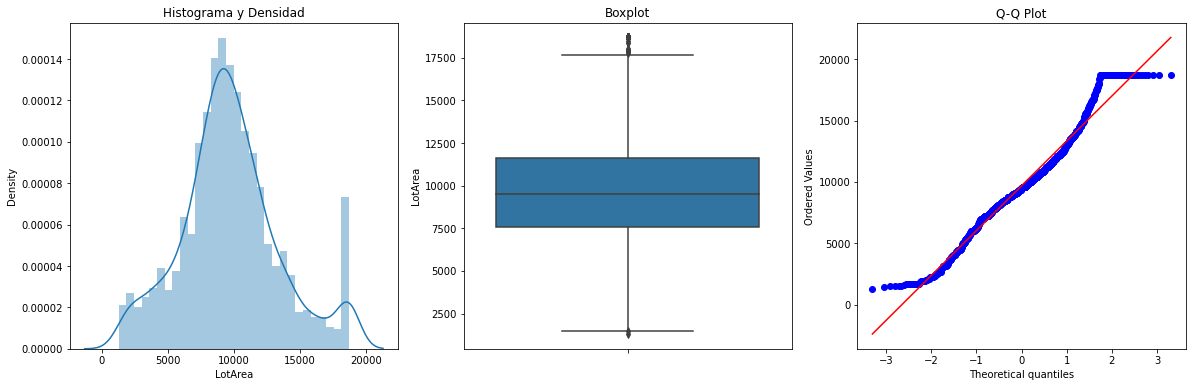

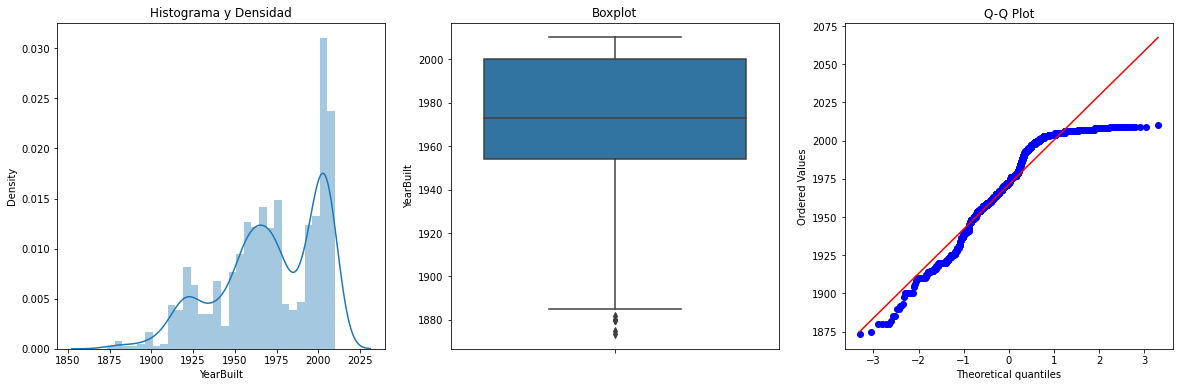

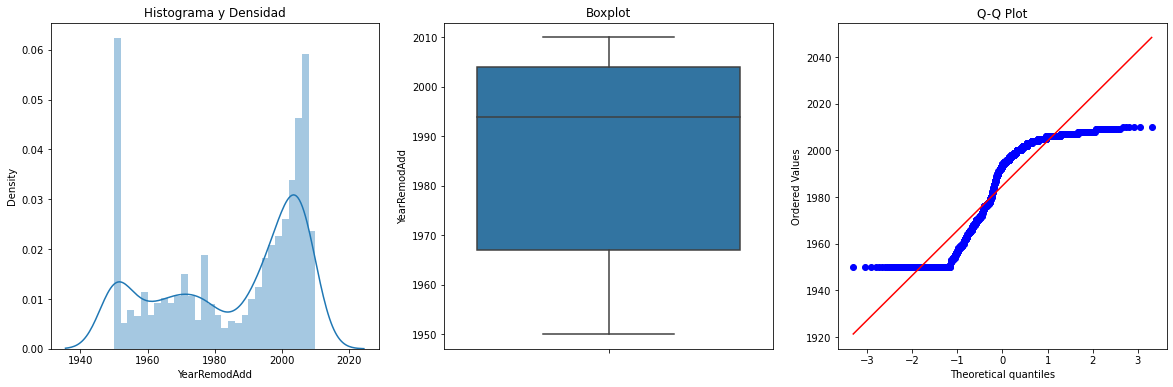

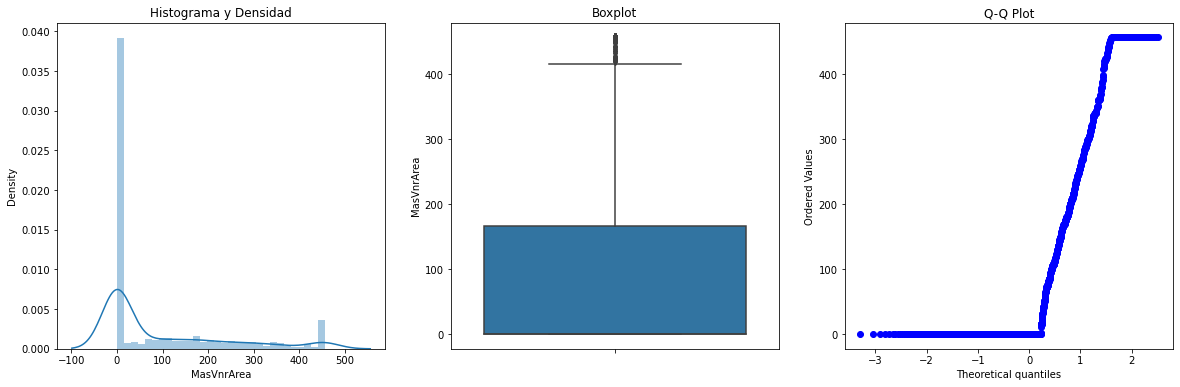

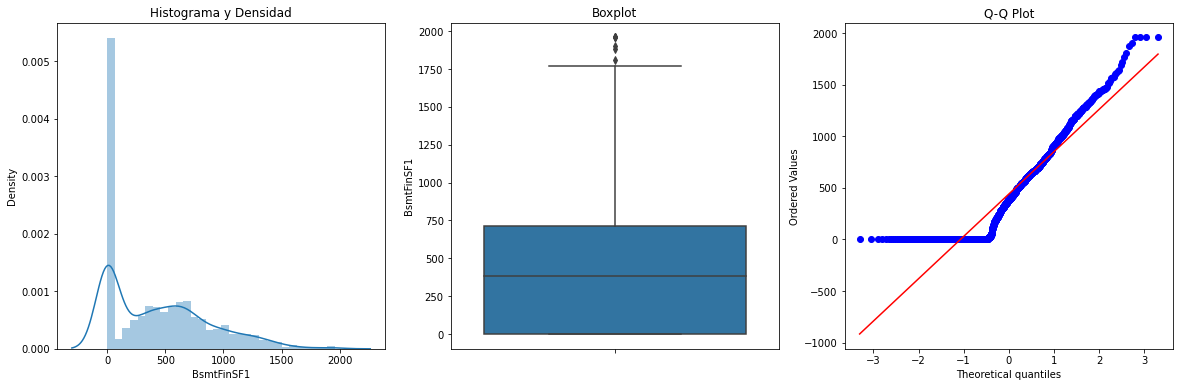

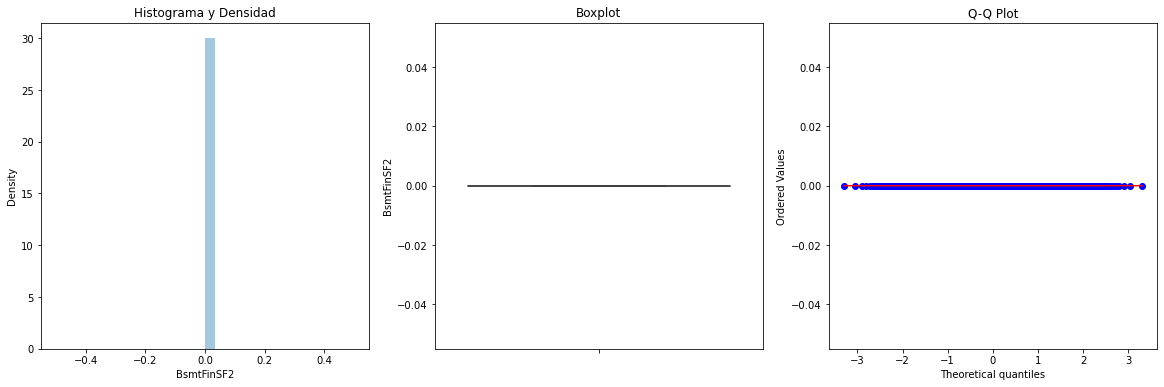

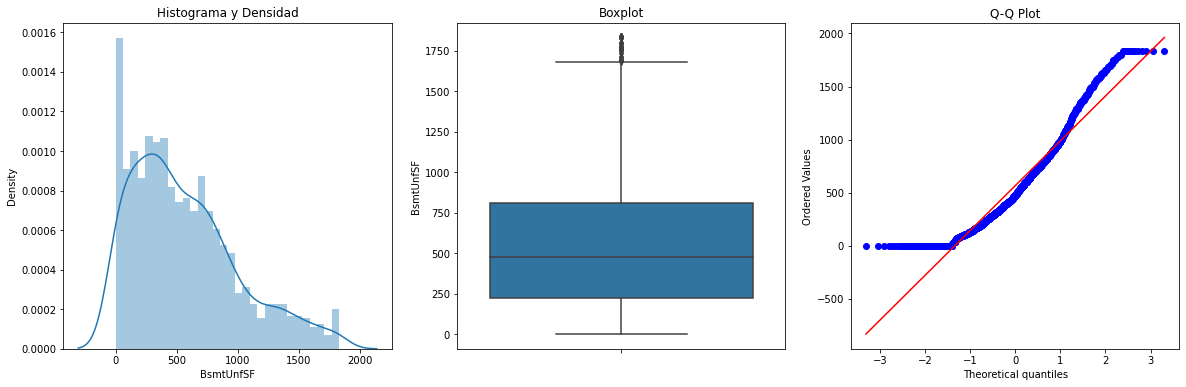

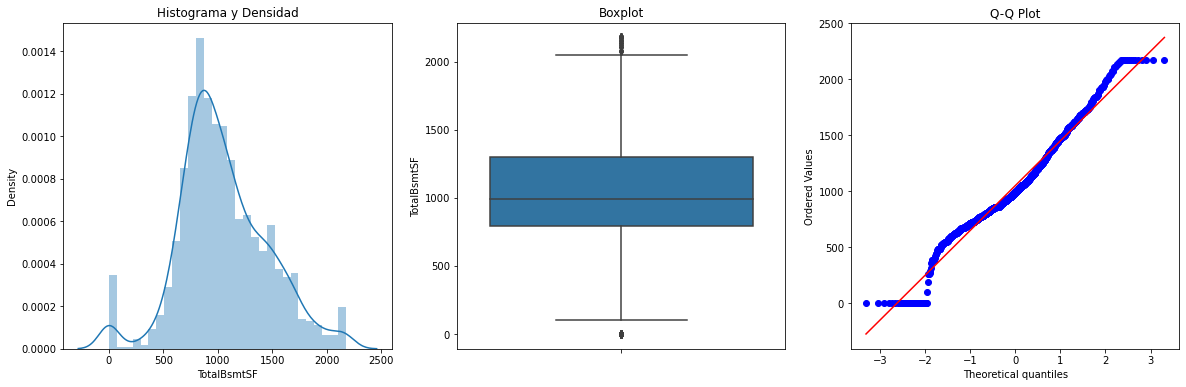

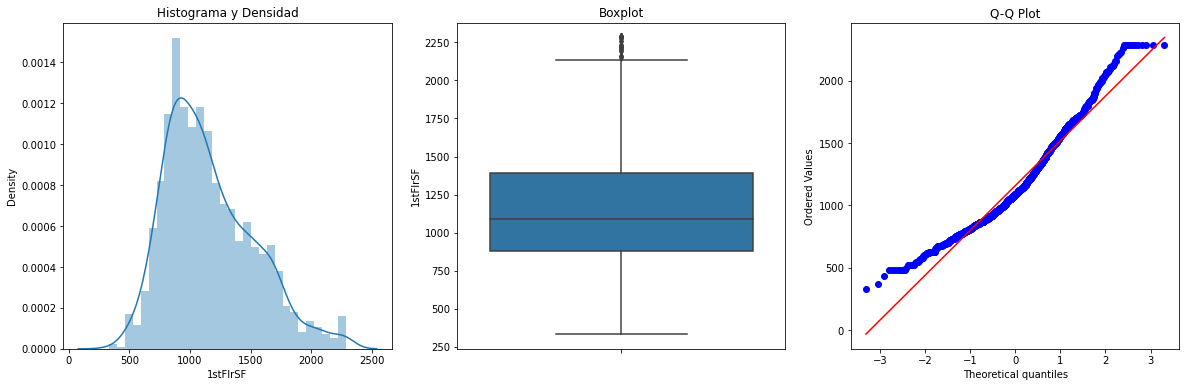

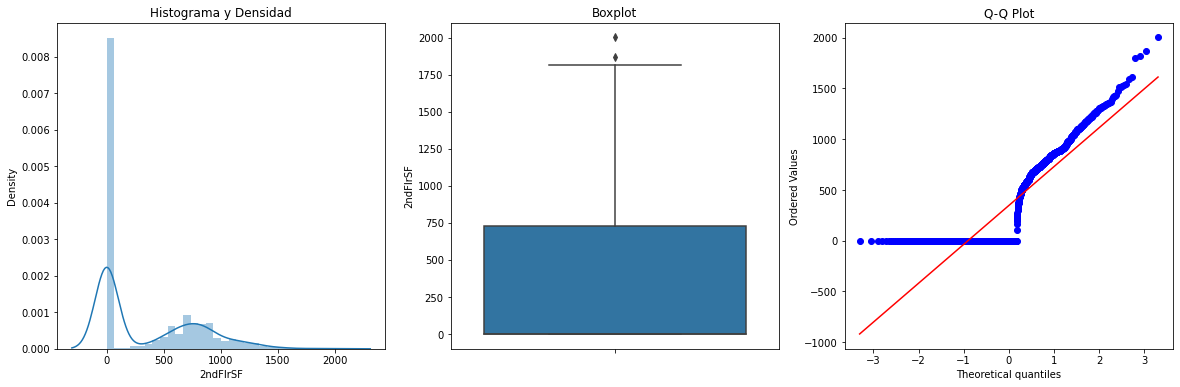

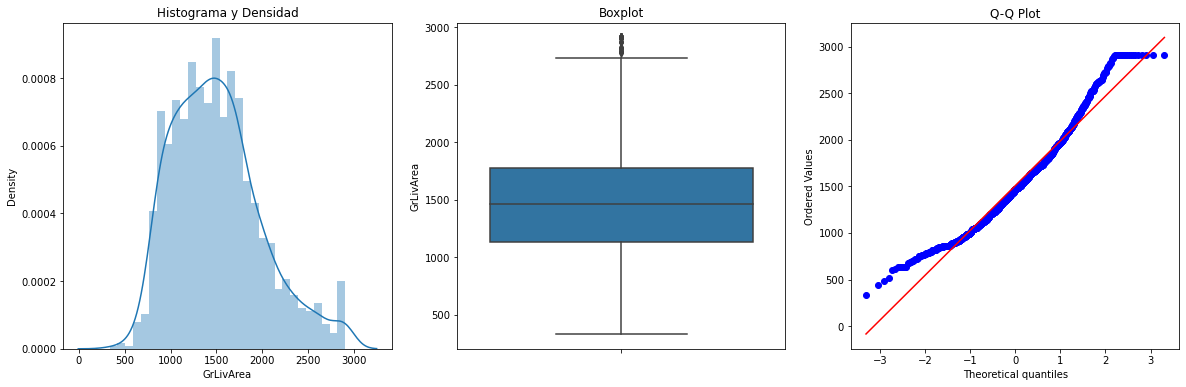

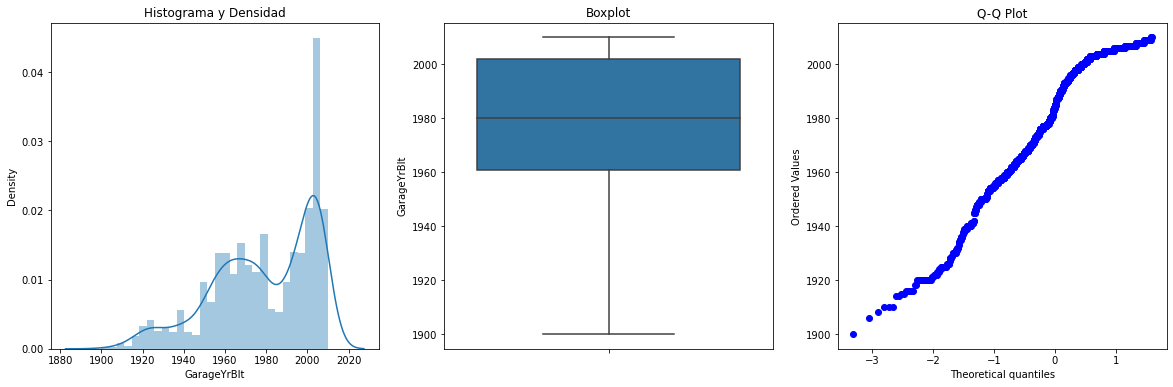

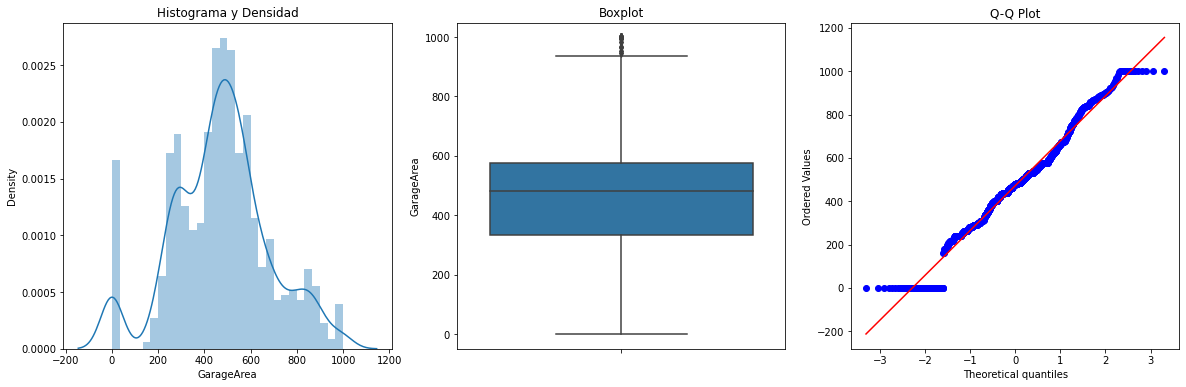

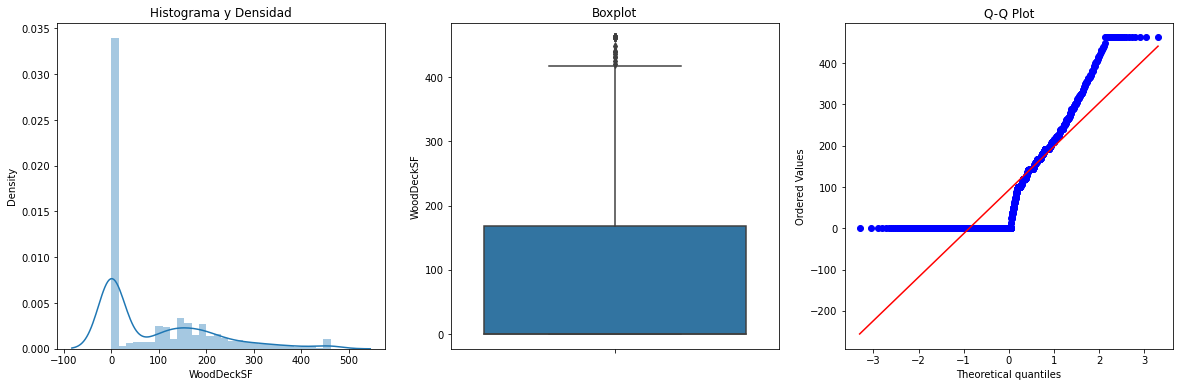

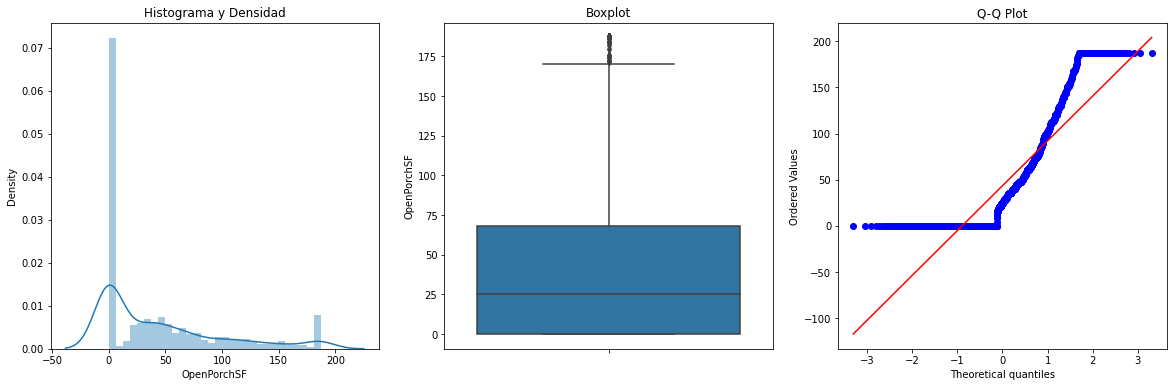

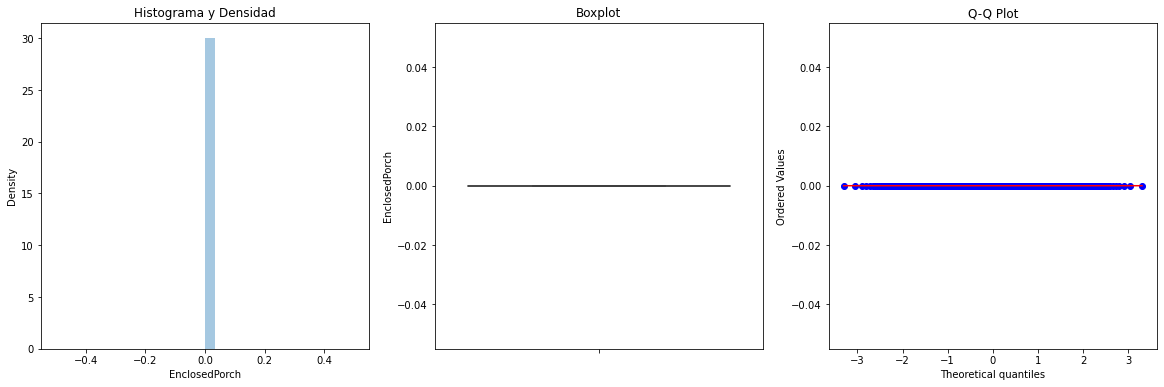

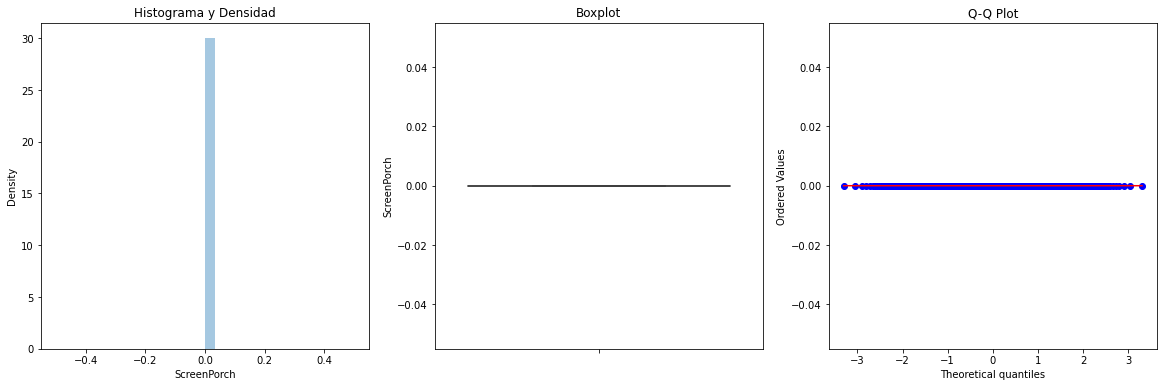

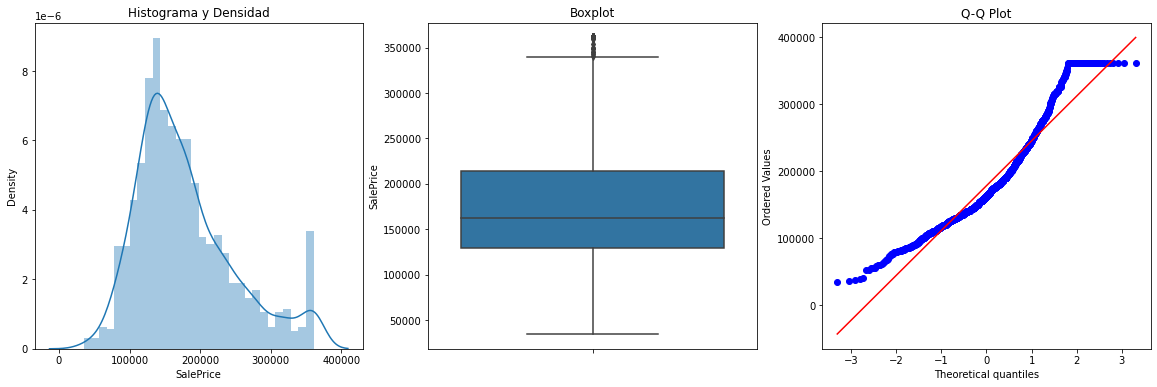

In [42]:
for col in continuas:
    print(f"-----------{col}------------")
    plotDistBoxQQ(dflimits, col)

-----------MSSubClass------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------OverallQual------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------OverallCond------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------LowQualFinSF------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BsmtFullBath------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BsmtHalfBath------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------FullBath------------
-----------HalfBath------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------BedroomAbvGr------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------KitchenAbvGr------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------TotRmsAbvGrd------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------Fireplaces------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------GarageCars------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------3SsnPorch------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------PoolArea------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------MiscVal------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------MoSold------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-----------YrSold------------


c:\Users\Compu Fire\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


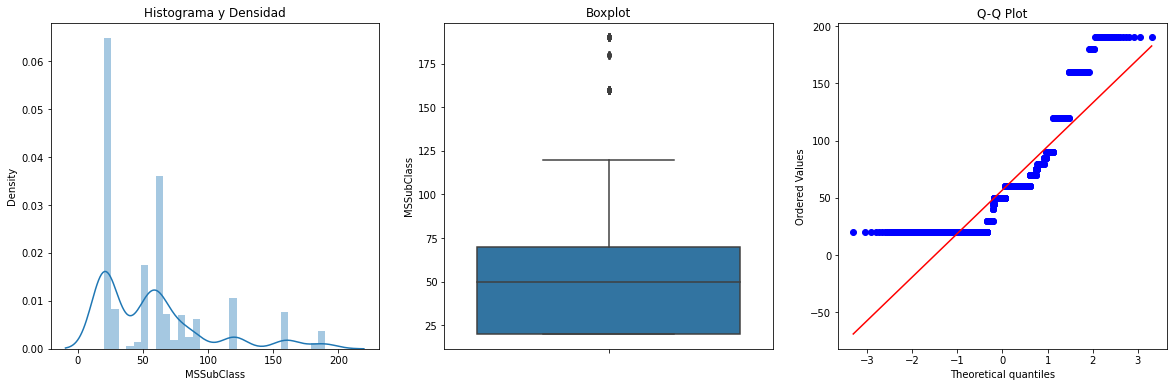

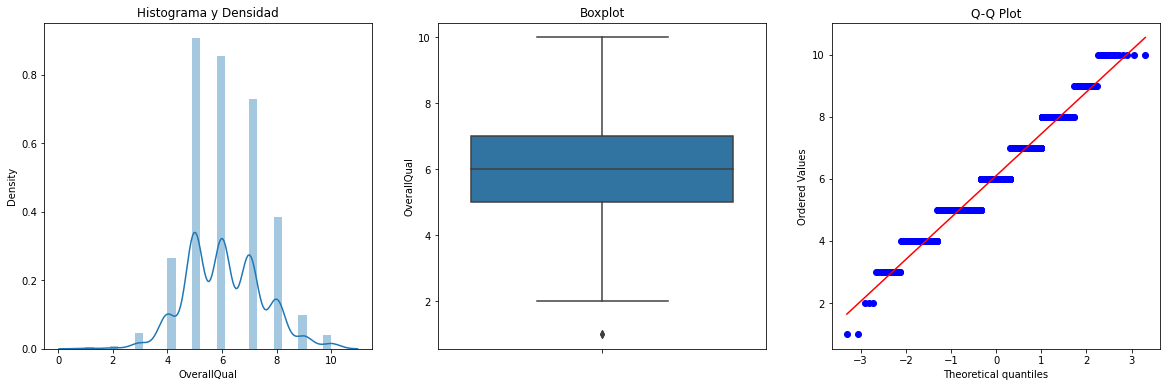

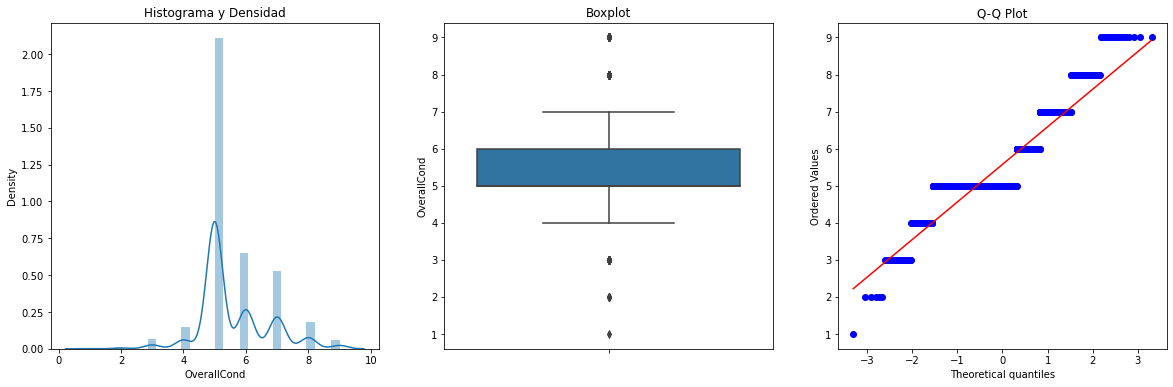

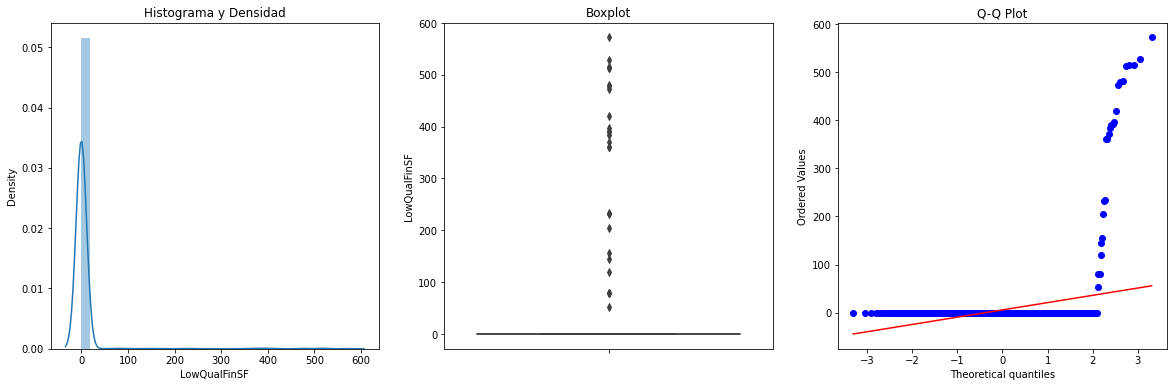

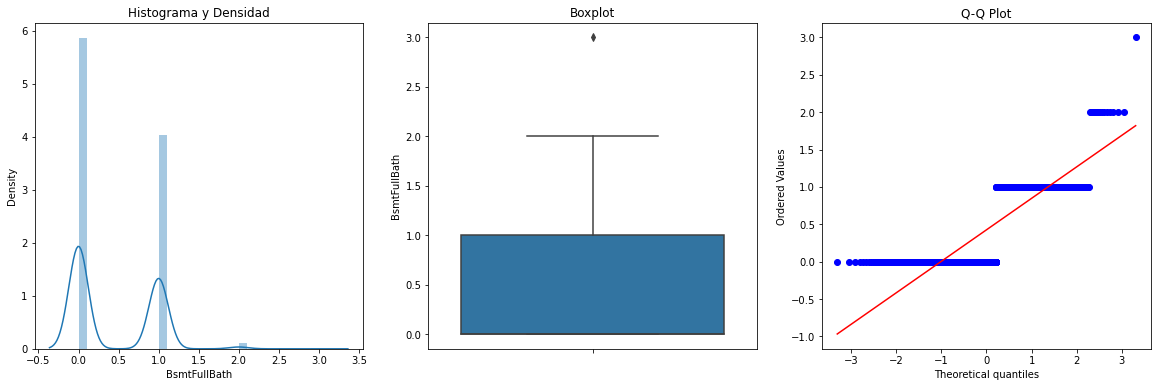

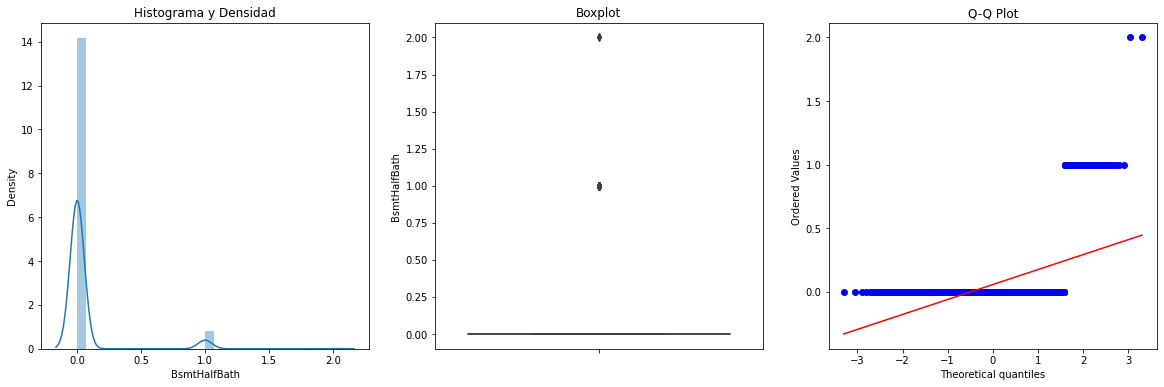

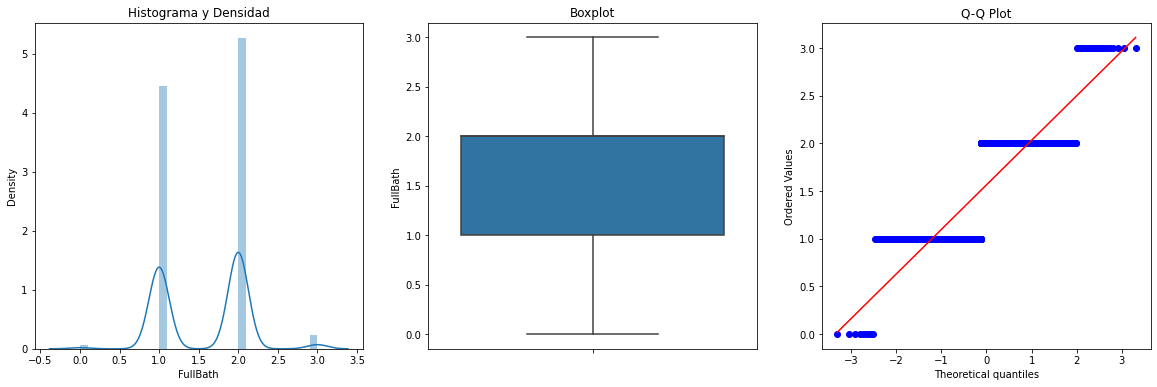

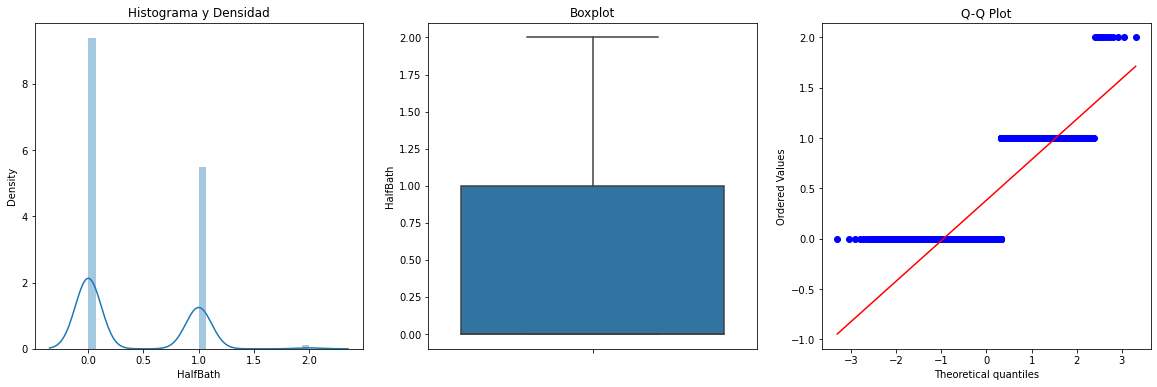

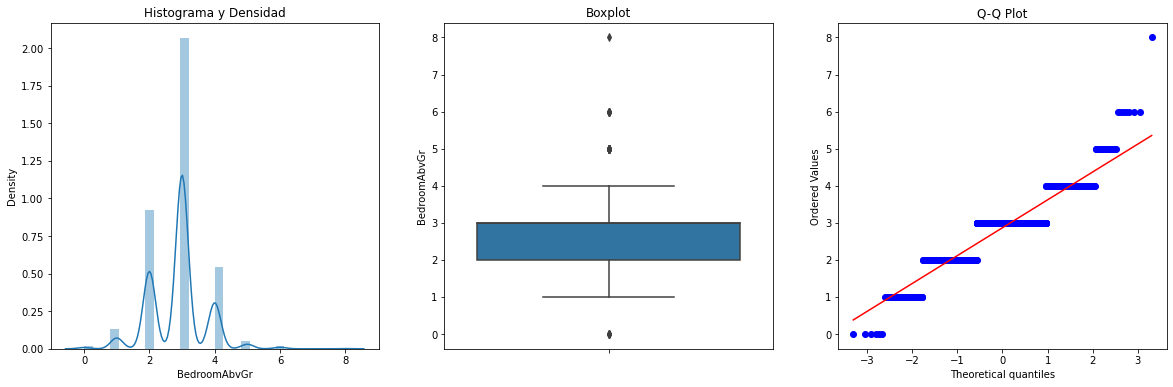

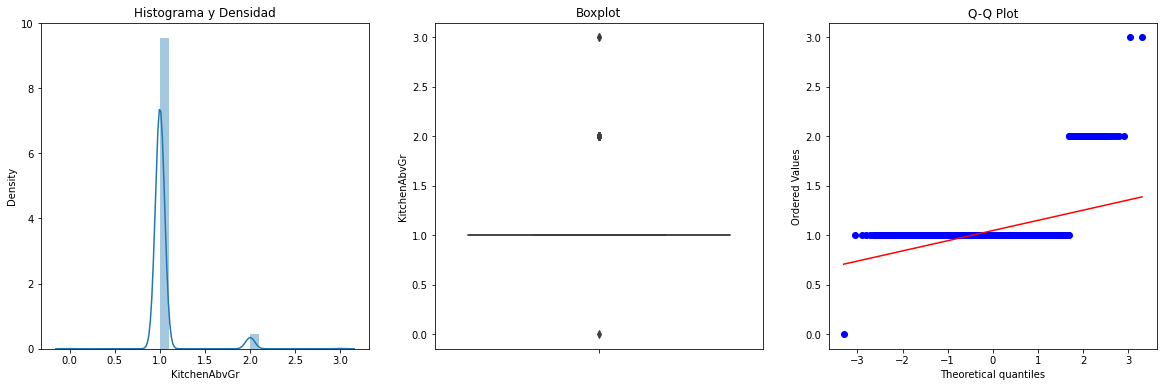

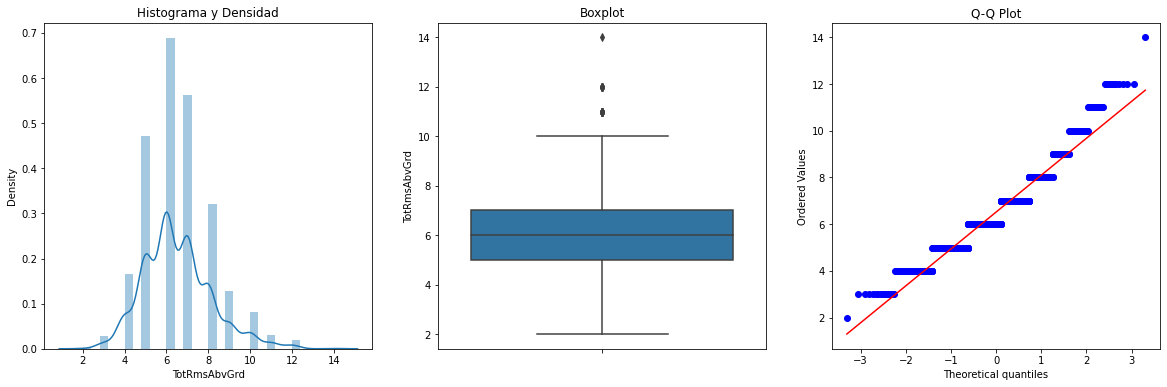

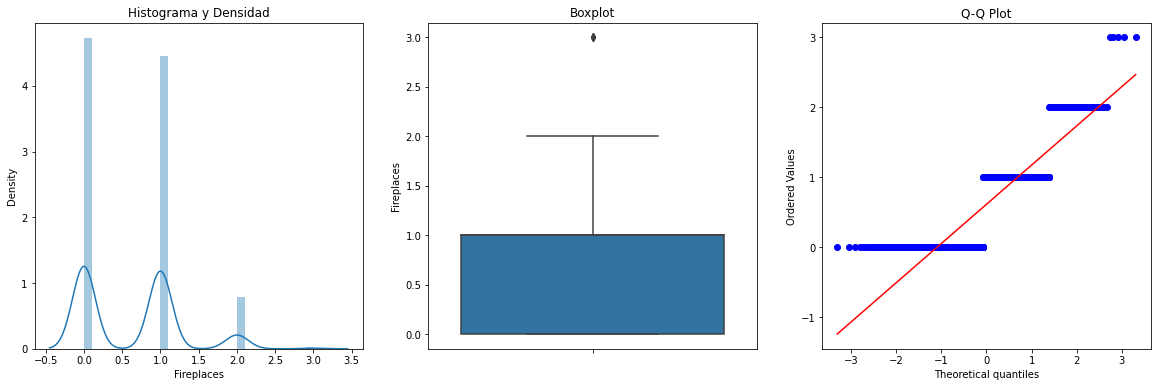

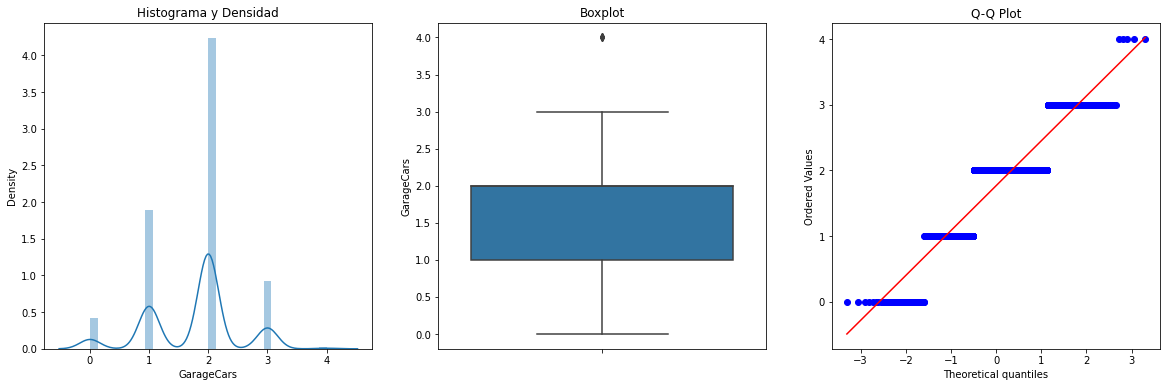

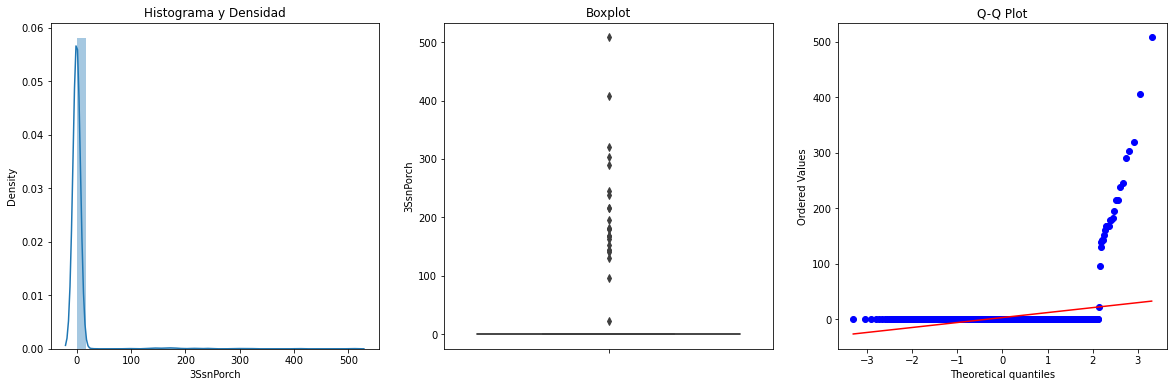

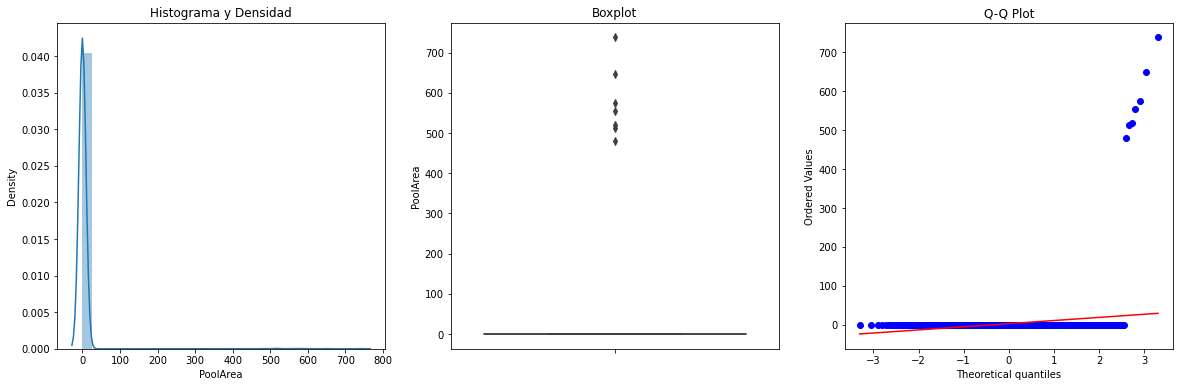

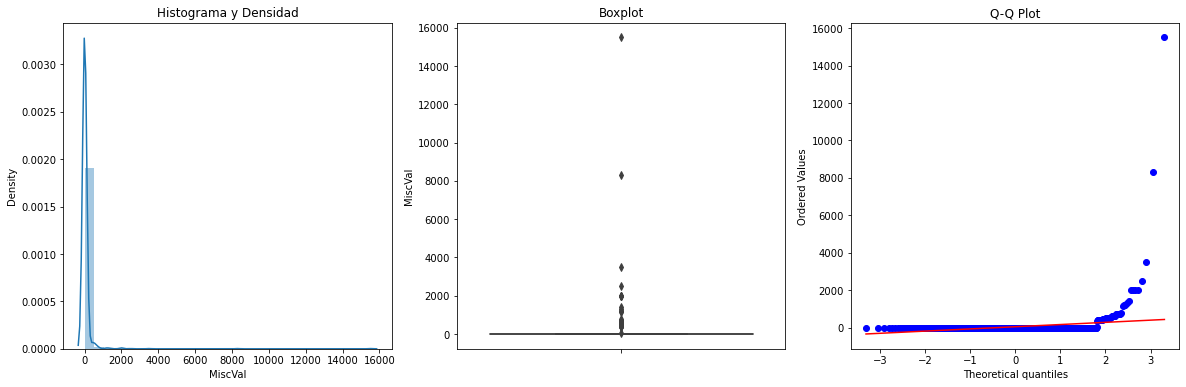

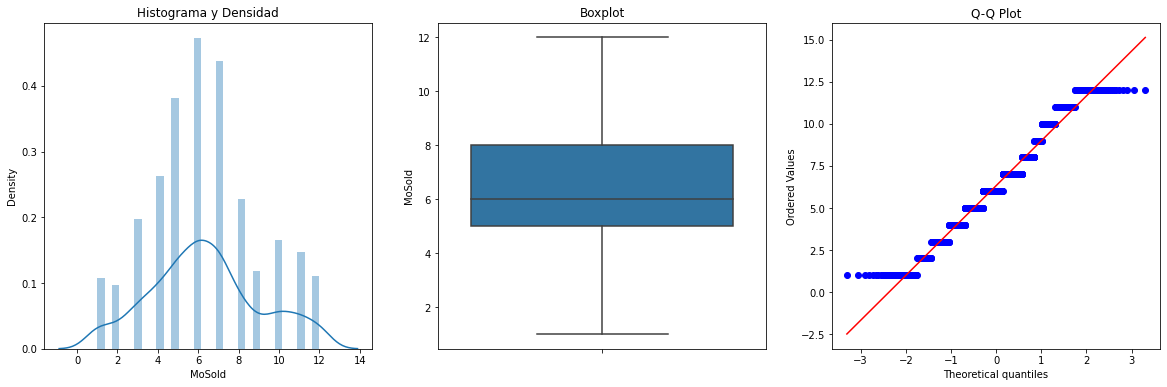

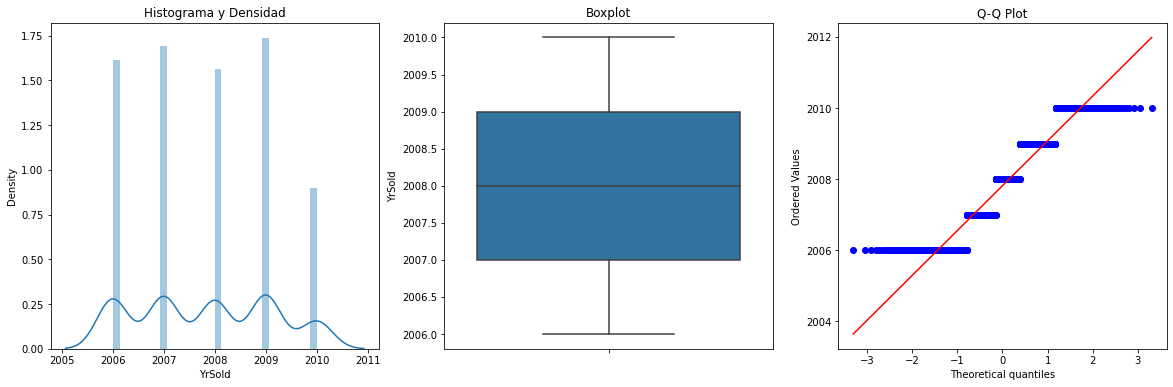

In [43]:
for col in discretas:
    print(f"-----------{col}------------")
    plotDistBoxQQ(dflimits, col) 